<a href="https://colab.research.google.com/github/hamxathirr/Analysis-and-Prediction-on-Coronavirus-Italy-/blob/master/analysis_and_prediction_on_coronavirus_italy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> **Current Scenario**

** There are 9172 confirmed cases according to WHO. Italy is a member state of European Union andvery popular for tourism. The first case was confirmed on 30th of january when two infected chinese tourists were found. Italy is the most infected country in Europe and second most affected place after China. Many italian visitors were confirmed that they are infected with Coronavirus after visiting different foreign countries. Many Countries from Asia, America, Europe found their local cases from Italy. In the very beginning only the northern area of italy was affected after a very short time it had spread to whole italy**

**Libraries**

In [0]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px
import datetime
from datetime import date, timedelta
from sklearn.cluster import KMeans
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, add_changepoints_to_plot
import plotly.offline as py
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from keras.models import Sequential
from keras.layers import LSTM,Dense
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

Using TensorFlow backend.


**Reading Data**

In [0]:
data=pd.read_csv("../input/covid19-in-italy/covid19_italy_region.csv")

In [0]:
an_data = pd.read_csv("../input/novel-corona-virus-2019-dataset/COVID19_open_line_list.csv")

In [0]:
comp = pd.read_excel('/kaggle/input/covid19327/COVID-19-3.27-top30-500.xlsx')

In [0]:
province = pd.read_csv("../input/covid19-in-italy/covid19_italy_province.csv")

 **Looking into data**

In [0]:
an_data.head()

,ID,age,sex,city,province,country,wuhan(0)_not_wuhan(1),latitude,longitude,geo_resolution,...,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44
0,1.0,30,male,"Chaohu City, Hefei City",Anhui,China,1.0,31.646960,117.716600,admin3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,47,male,"Baohe District, Hefei City",Anhui,China,1.0,31.778630,117.331900,admin3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,49,male,"High-Tech Zone, Hefei City",Anhui,China,1.0,31.828313,117.224844,point,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,47,female,"High-Tech Zone, Hefei City",Anhui,China,1.0,31.828313,117.224844,point,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,50,female,"Feidong County, Hefei City",Anhui,China,1.0,32.001230,117.568100,admin3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
an_data = an_data[an_data['country']=='Italy']
an_data.shape


(588, 45)

**Age distribution of Confirmation**

[(0, 133.1891721424099)]

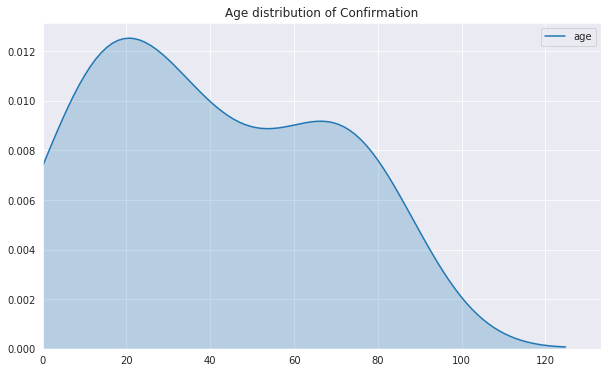

In [0]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
plt.title("Age distribution of Confirmation")
sns.kdeplot(data=an_data['age'], shade=True).set(xlim=(0))

> **Age**

**Here, the graph shows the age distribution of the infected people by gender. We can clearly see older people are more likely to be infected, especially older people with having lung disease and problems in their respiratory system. The age group of 40 to 50yr are more infected than the rest of the population in men. On the other hand age groups of 50yr to 70yr are more infected in womens. As Dr.Steven Gambert, professor of medicine and director of geriatrics at the University of Maryland School of Medicine says “ Older people have higher risk of underlying health conditions, older people are already under physical stress, and their immune systems, even if not significantly compromised, simply do not have the same “ability to fight viruses and bacteria”. As data says Italy has the oldest population across globe by count. According to EU statistics Italy has the lowest percentage of young people**.

**Gender Distribution of Confirmatioin**

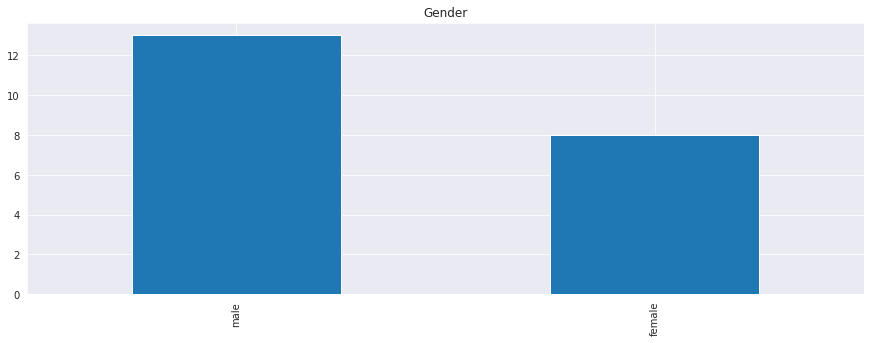

In [0]:
plt.figure(figsize=(15, 5))
plt.title('Gender')
an_data.sex.value_counts().plot.bar();

In [0]:
fig = px.pie( values=an_data.groupby(['sex']).size().values,names=an_data.groupby(['sex']).size().index)
fig.update_layout(
    font=dict(
        size=15,
        color="#242323"
    )
    )   
    
py.iplot(fig)

>  **Gender**

**The graph shows the age distribution of infected and confirmed people
by gender where men are more likely to die from coronavirus than
women. Research has found that middle-aged and older men are
having more chances to get infected by the virus. Researchers had
found that the infection rate among men and women is the same but the
death rate among men is 2.8% as compared with 1.7% for women.
As there are a few reasons men are more likely to die from the new
coronavirus. As because Women have a heightened immunity system
response. Scientists have explained the reason for more numbers of
infected people from Coronavirus in men over women. As in china
almost 50- 80% of men do smoking whereas only 2-3% of women do
smoking which affects the respiratory system of men over women.**

**Age distribution of the confirmation by gender**

In [0]:
male_dead = an_data[an_data.sex=='male']
female_dead = an_data[an_data.sex=='female']

[(0, 163.9277045948024)]

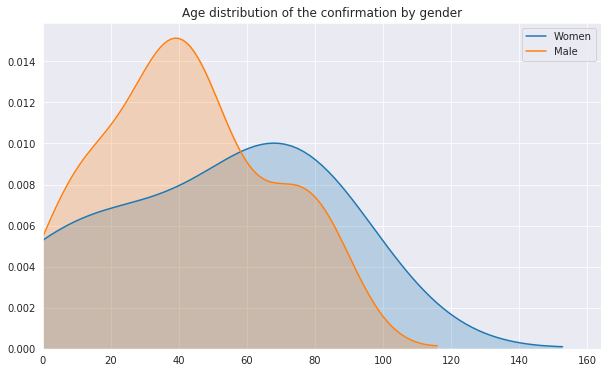

In [0]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
plt.title("Age distribution of the confirmation by gender")
sns.kdeplot(data=female_dead['age'], label="Women", shade=True).set(xlim=(0))
sns.kdeplot(data=male_dead['age'],label="Male" ,shade=True).set(xlim=(0))


/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:243: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



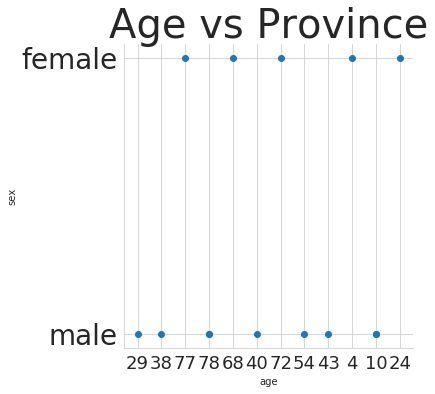

In [0]:
sns.set_style("whitegrid")
sns.FacetGrid(an_data,  size = 5)\
.map(plt.scatter, 'age', 'sex')\
.add_legend()
plt.title('Age vs Province',fontsize=40)
plt.xticks(fontsize=18)
plt.yticks(fontsize=28)


plt.show()

In [0]:
data.head()

,SNo,Date,Country,RegionCode,RegionName,Latitude,Longitude,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
0,0,2020-02-24T18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,0,0,0,0,0,5
1,1,2020-02-24T18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,0,0,0,0,0,0
2,2,2020-02-24T18:00:00,ITA,4,P.A. Bolzano,46.499335,11.356624,0,0,0,0,0,0,0,0,0,1
3,3,2020-02-24T18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,0,0,0,0,0,1
4,4,2020-02-24T18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,0,0,0,0,0,0,10


**Checking for Null Value**

In [0]:
data.isna().sum()

SNo                          0
Date                         0
Country                      0
RegionCode                   0
RegionName                   0
Latitude                     0
Longitude                    0
HospitalizedPatients         0
IntensiveCarePatients        0
TotalHospitalizedPatients    0
HomeConfinement              0
CurrentPositiveCases         0
NewPositiveCases             0
Recovered                    0
Deaths                       0
TotalPositiveCases           0
TestsPerformed               0
dtype: int64

**Description of Data**

In [0]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SNo,714.0,356.500000,206.258333,0.000000,178.250000,356.500000,534.750000,713.000000
RegionCode,714.0,10.190476,5.799126,1.000000,5.000000,10.000000,15.000000,20.000000
Latitude,714.0,43.046293,2.490525,38.115697,41.125596,43.616760,45.434905,46.499335
Longitude,714.0,12.225955,2.660812,7.320149,11.121231,12.388247,13.768136,16.867367
HospitalizedPatients,714.0,439.222689,1335.465639,0.000000,3.000000,43.000000,241.000000,11152.000000
IntensiveCarePatients,714.0,69.981793,172.310464,0.000000,0.000000,10.000000,54.000000,1319.000000
TotalHospitalizedPatients,714.0,509.205882,1504.948444,0.000000,4.000000,54.500000,289.750000,12471.000000
HomeConfinement,714.0,502.457983,1307.630361,0.000000,5.000000,70.000000,398.500000,12038.000000
CurrentPositiveCases,714.0,1011.662465,2760.010123,0.000000,10.000000,127.000000,740.250000,24509.000000
NewPositiveCases,714.0,98.130252,219.819022,-63.000000,1.000000,24.000000,84.750000,1950.000000


**Tracking the Patient**

In [0]:
data.shape

(714, 17)

In [0]:
clus=data.loc[:,['SNo','Latitude','Longitude']]
clus.head()

,SNo,Latitude,Longitude
0,0,42.351222,13.398438
1,1,40.639471,15.805148
2,2,46.499335,11.356624
3,3,38.905976,16.594402
4,4,40.839566,14.250850


**Checking for number of cluster**

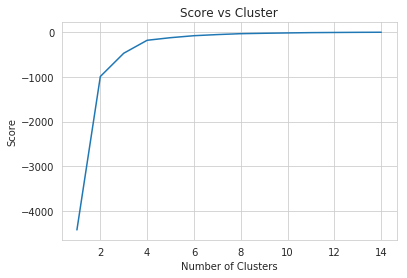

In [0]:
K_clusters = range(1,15)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = data[['Latitude']]
X_axis = data[['Longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Score vs Cluster')
plt.show()

**The score get cosntant after 4 clusters, so making more clusters will not help us. The value for k is 4 in this case**

In [0]:
kmeans = KMeans(n_clusters = 4, init ='k-means++')
kmeans.fit(clus[clus.columns[1:3]])
clus['cluster_label'] = kmeans.fit_predict(clus[clus.columns[1:3]])
centers = kmeans.cluster_centers_
labels = kmeans.predict(clus[clus.columns[1:3]])

**Graphical representation of clusters**

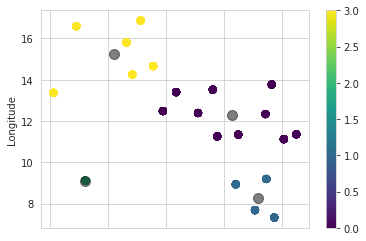

In [0]:
clus.plot.scatter(x = 'Latitude', y = 'Longitude', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)

**We will verify our clusters by putting values in world map by making use of folium library**

**Affected place in world map including Hospitalised , Confirm , Deaths and Recovery**

In [0]:
 import folium
italy_map = folium.Map(location=[42.8719,12.5674 ], zoom_start=5,tiles='Stamen Toner')

for lat, lon,RegionName,TotalPositiveCases,Recovered,Deaths,TotalHospitalizedPatients in zip(data['Latitude'], data['Longitude'],data['RegionName'],data['TotalPositiveCases'],data['Recovered'],data['Deaths'],data['TotalHospitalizedPatients']):
    folium.CircleMarker([lat, lon],
                        radius=5,
                        color='red',
                      popup =('RegionName: ' + str(RegionName) + '<br>'
                    'TotalPositiveCases: ' + str(TotalPositiveCases) + '<br>'
                    'TotalHospitalizedPatients: ' + str(TotalHospitalizedPatients) + '<br>'
                      'Recovered: ' + str(Recovered) + '<br>'
                      'Deaths: ' + str(Deaths) + '<br>'),

                        fill_color='red',
                        fill_opacity=0.7 ).add_to(italy_map)
italy_map

**The most affected cities and regions early in Italy are Lombardy, and then Emilia-Romagna, Veneto, Marche, and Piemonte. Milan is the second most populous Italian city which is located in Lombardy. Other areas in Italy which are affected by coronavirus include Toscana, Campania, Lazio, Liguria, Friuli Venezia Giulia, Sicilia, Puglia, Umbria, Abruzzo, Trento, Molise, Calabria, Sardegna, Valle d’Aosta, Basilicata, and Bolzano. As italy was the fourth most affected coronavirus country
till last feb but now it has reached the maximum number of confirmed cases after China**

**Grouping Data According to  Region Name**

In [0]:
data['Date'] = pd.to_datetime(data['Date']).dt.normalize()
daily = data.sort_values(['Date','Country','RegionName'])
latest = data[data.Date == daily.Date.max()]
latest.head()

,SNo,Date,Country,RegionCode,RegionName,Latitude,Longitude,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
693,693,2020-03-28,ITA,13,Abruzzo,42.351222,13.398438,311,70,381,646,1027,102,30,76,1133,7003
694,694,2020-03-28,ITA,17,Basilicata,40.639471,15.805148,26,19,45,133,178,31,1,3,182,1421
695,695,2020-03-28,ITA,4,P.A. Bolzano,46.499335,11.356624,225,51,276,653,929,96,116,64,1109,9168
696,696,2020-03-28,ITA,18,Calabria,38.905976,16.594402,107,22,129,394,523,54,11,21,555,7760
697,697,2020-03-28,ITA,15,Campania,40.839566,14.250850,463,132,595,812,1407,115,76,109,1592,10616


In [0]:
data_groupby_region = latest.groupby("RegionName")[['TotalPositiveCases', 'Deaths', 'Recovered','TestsPerformed','HospitalizedPatients','TotalHospitalizedPatients']].sum().reset_index()
dgr = data_groupby_region 
dgr.head()

,RegionName,TotalPositiveCases,Deaths,Recovered,TestsPerformed,HospitalizedPatients,TotalHospitalizedPatients
0,Abruzzo,1133,76,30,7003,311,381
1,Basilicata,182,3,1,1421,26,45
2,Calabria,555,21,11,7760,107,129
3,Campania,1592,109,76,10616,463,595
4,Emilia Romagna,12383,1344,1075,52991,3695,4011


**Desciption of Grouped Data by Region**

In [0]:
dgr.describe().T

,count,mean,std,min,25%,50%,75%,max
TotalPositiveCases,21.0,4403.428571,8593.297013,123.0,969.0,1458.0,3373.0,39415.0
Deaths,21.0,477.285714,1289.113926,3.0,41.0,87.0,358.0,5944.0
Recovered,21.0,589.714286,1935.688718,1.0,29.0,76.0,203.0,8962.0
TestsPerformed,21.0,20453.619048,27762.134541,807.0,7003.0,9884.0,21511.0,102503.0
HospitalizedPatients,21.0,1270.285714,2464.149045,26.0,159.0,441.0,1031.0,11152.0
TotalHospitalizedPatients,21.0,1453.904762,2746.264752,35.0,203.0,512.0,1198.0,12471.0


**Test performed vs Region**

In [0]:
fig = px.bar(dgr[['RegionName', 'TestsPerformed']].sort_values('TestsPerformed', ascending=False), 
             y="TestsPerformed", x="RegionName", color='RegionName', 
             log_y=True, template='ggplot2', title='Test Performed vs Region')
fig.show()


**As the graph shows the test performed in different regions of Italy. Lombardia has the maximum number(25k+) of tests performed as it is the most infected in cities. As a result the next graph shows that it has the maximum number(7280) of positive coronavirus patients. Veneto is the second most infected city here followed by some more countries like Emilia Romagna, Lazio, Marche, Toscana, Piemonte, Friuli V.G. ,Campania, Sicilia, Liguria, Puglia, P.A. Trento, Calabria, Umbria, Abruzzo, Sardegna, Molisa, Basilicata, Valle d'Aosta, P.A. Bolzano etc.
**

**Confirmed Cases vs Region**

In [0]:
fig = px.bar(dgr[['RegionName', 'TotalPositiveCases']].sort_values('TotalPositiveCases', ascending=False), 
             y="TotalPositiveCases", x="RegionName", color='RegionName', 
             log_y=True, template='ggplot2', title='Confirmed Cases vs Region')
fig.show()


**There are more than 10,000 people who are infected through this virus. Italy is the most affected country in the world after China, with 827 deaths and 12,462 confirmed cases in almost three weeks. The government has restricted all flights from china. as because at the end of January after two Chinese tourists came down with coronavirus during a trip to Italy. At the time, it was hopefully the best measure which can
block the spread of the disease**

**Hospitalised Patient vs Region**

In [0]:
fig = px.bar(dgr[['RegionName', 'TotalHospitalizedPatients']].sort_values('TotalHospitalizedPatients', ascending=False), 
             y="TotalHospitalizedPatients", x="RegionName", color='RegionName', 
             log_y=True, template='ggplot2', title='Hospitalised Patient vs Region')
fig.show()

**Recovery vs Region**

In [0]:
fig = px.bar(dgr[['RegionName', 'Recovered']].sort_values('Recovered', ascending=False), 
             y="Recovered", x="RegionName", color='RegionName', 
             log_y=True, template='ggplot2', title='Revovery vs Region')
fig.show()


**Death vs Region Name**

In [0]:
fig = px.bar(dgr[['RegionName', 'Deaths']].sort_values('Deaths', ascending=False), 
             y="Deaths", x="RegionName", color='RegionName', 
             log_y=True, template='ggplot2', title='Death vs Region')
fig.show()


In [0]:
dgrs_el = dgr.sort_values(by=['TotalPositiveCases'],ascending = False)
dgrs_el.head()

,RegionName,TotalPositiveCases,Deaths,Recovered,TestsPerformed,HospitalizedPatients,TotalHospitalizedPatients
8,Lombardia,39415,5944,8962,102503,11152,12471
4,Emilia Romagna,12383,1344,1075,52991,3695,4011
20,Veneto,7930,362,655,89380,1559,1903
13,Piemonte,7671,617,203,21511,3094,3533
17,Toscana,3817,198,108,25613,1093,1370


**Test and Confirm vs Region**

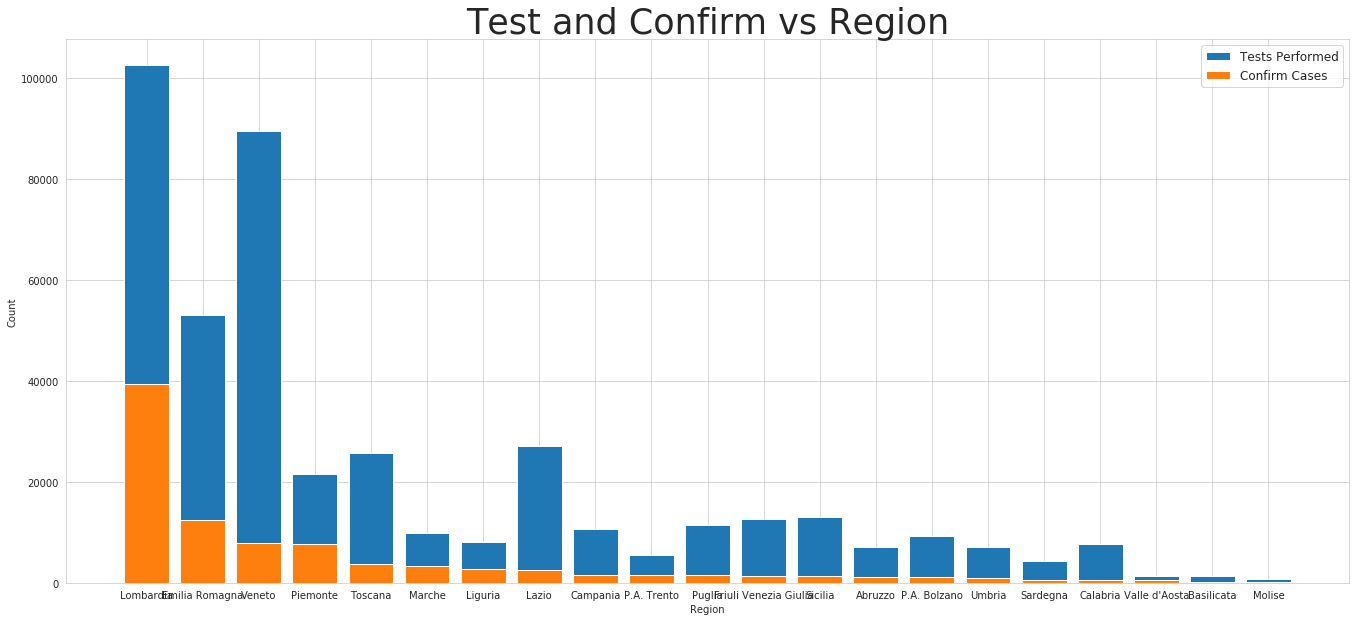

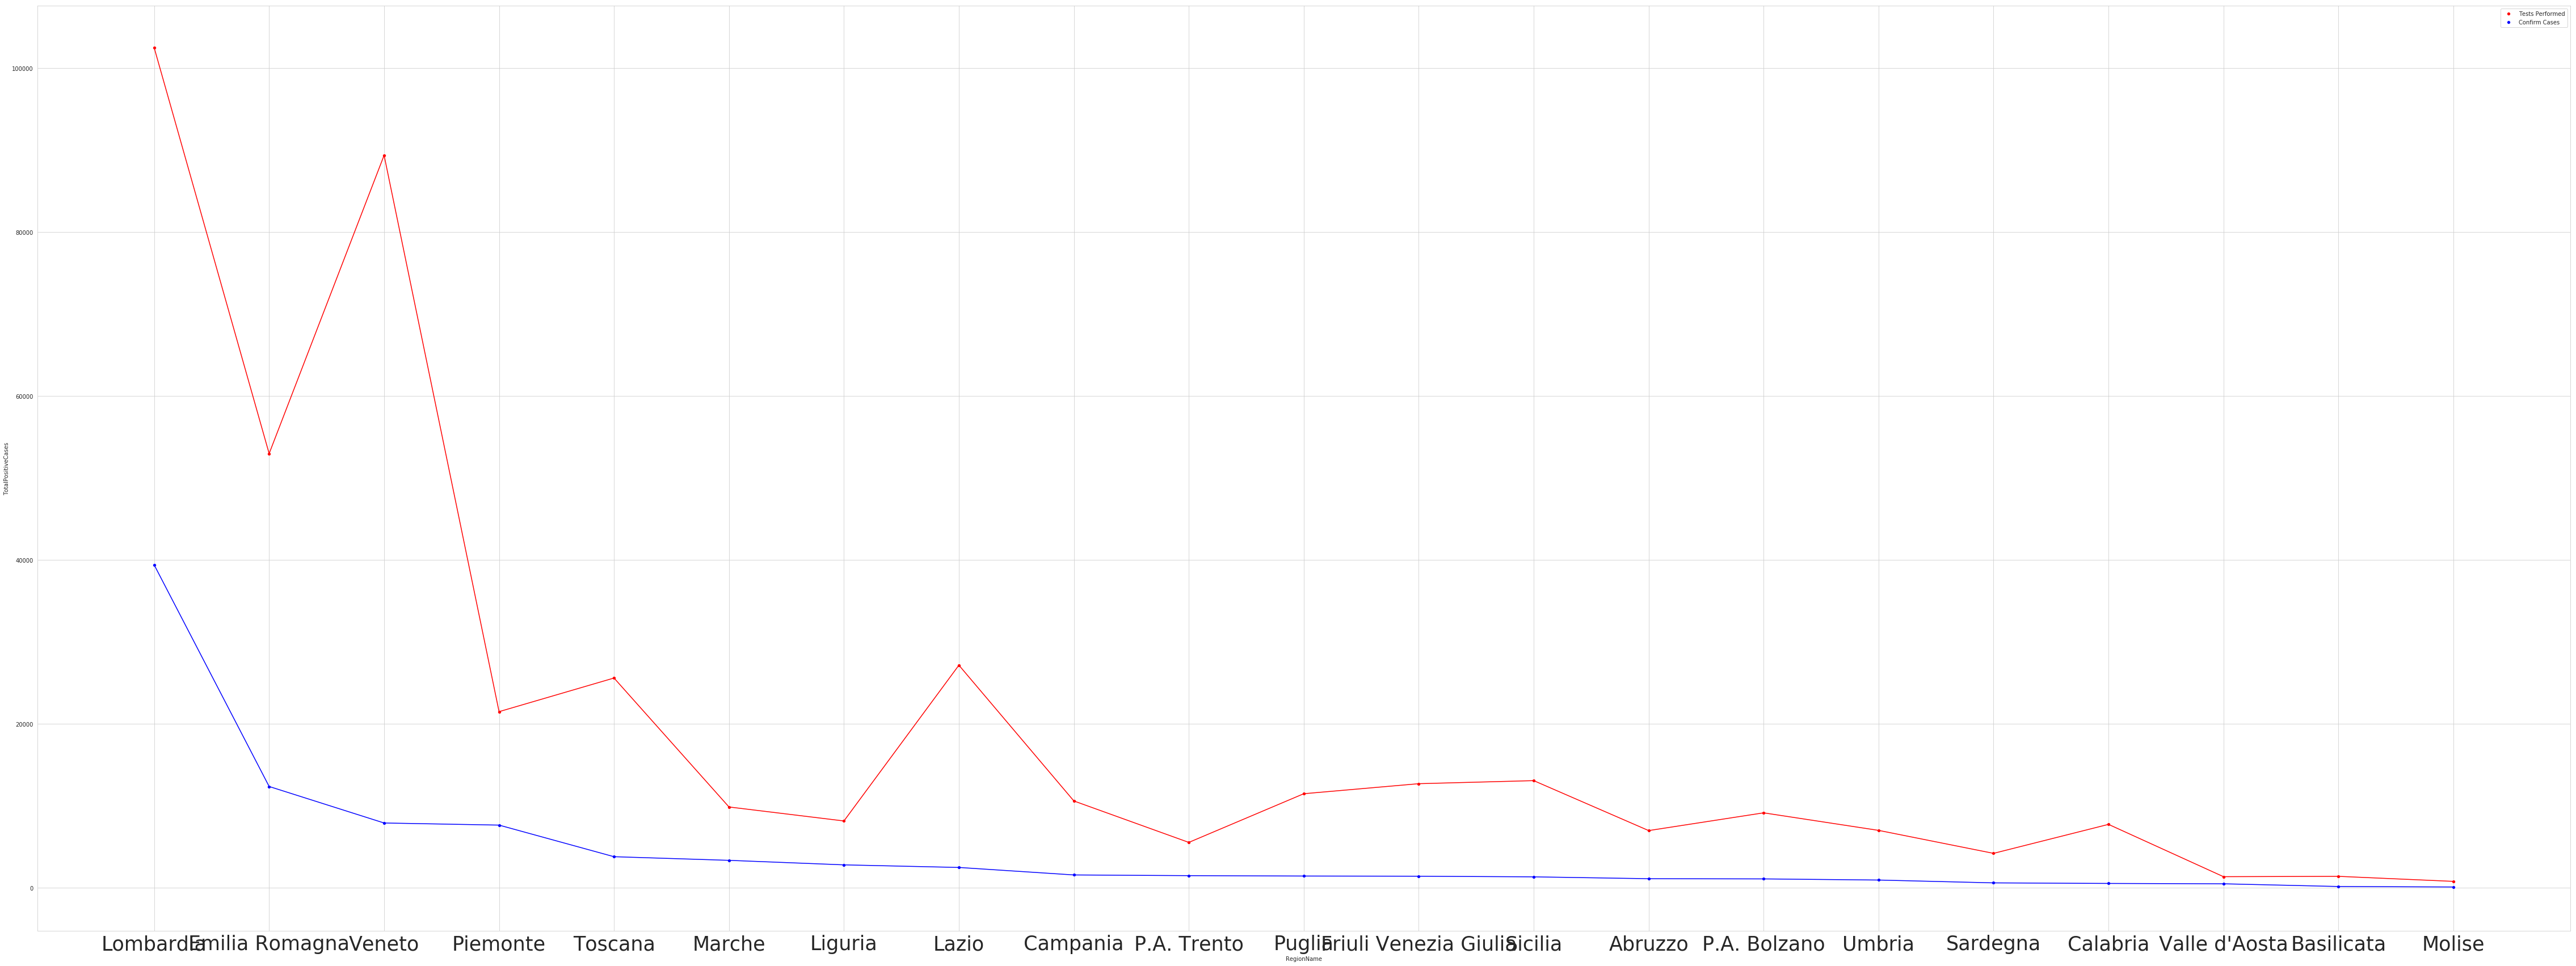

In [0]:
plt.figure(figsize=(23,10))
plt.bar(dgrs_el.RegionName, dgrs_el.TestsPerformed,label="Tests Performed")
plt.bar(dgrs_el.RegionName, dgrs_el.TotalPositiveCases,label="Confirm Cases")
plt.xlabel('Region')
plt.ylabel("Count")
plt.legend(frameon=True, fontsize=12)
plt.title('Test and Confirm vs Region',fontsize = 35)

plt.show()

f, ax = plt.subplots(figsize=(80,30))
ax=sns.scatterplot(x="RegionName", y="TestsPerformed", data=dgrs_el,
             color="red",label = "Tests Performed")
ax=sns.scatterplot(x="RegionName", y="TotalPositiveCases", data=dgrs_el,
             color="blue",label = "Confirm Cases")
ax.xaxis.set_tick_params(labelsize=35)

plt.plot(dgrs_el.RegionName,dgrs_el.TestsPerformed,zorder=1,color="red")
plt.plot(dgrs_el.RegionName,dgrs_el.TotalPositiveCases,zorder=1,color="blue")

**Confirmed cases vs People Hospitalised**

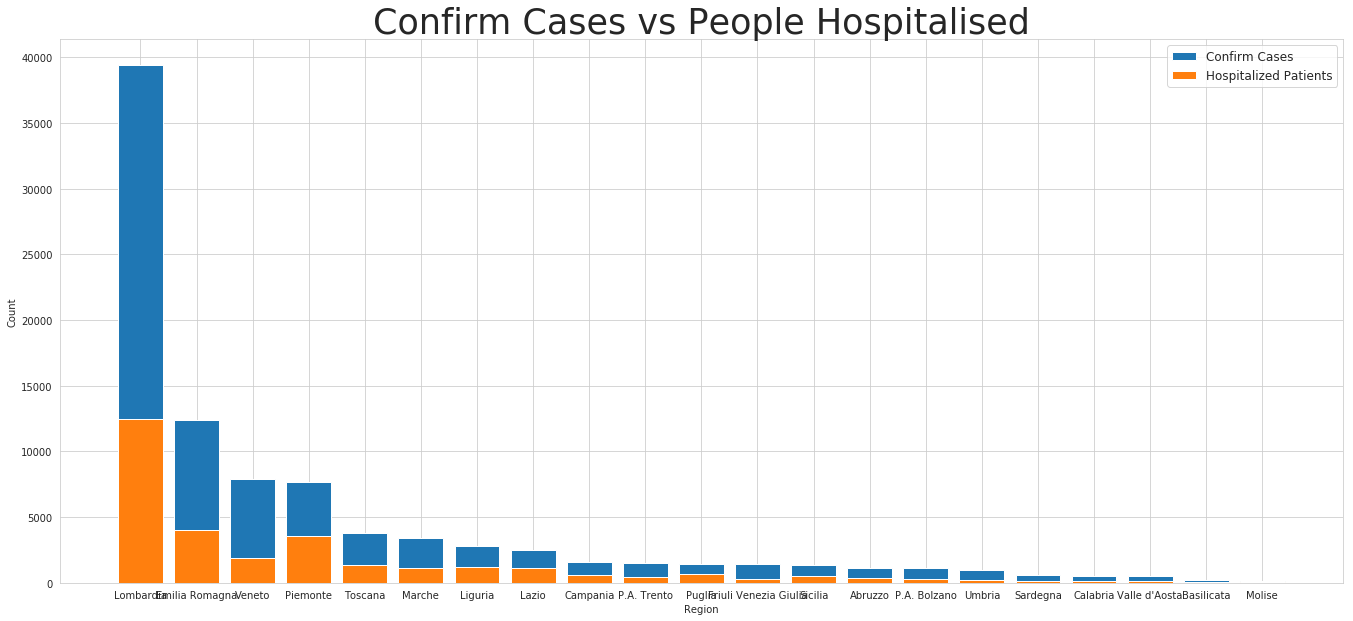

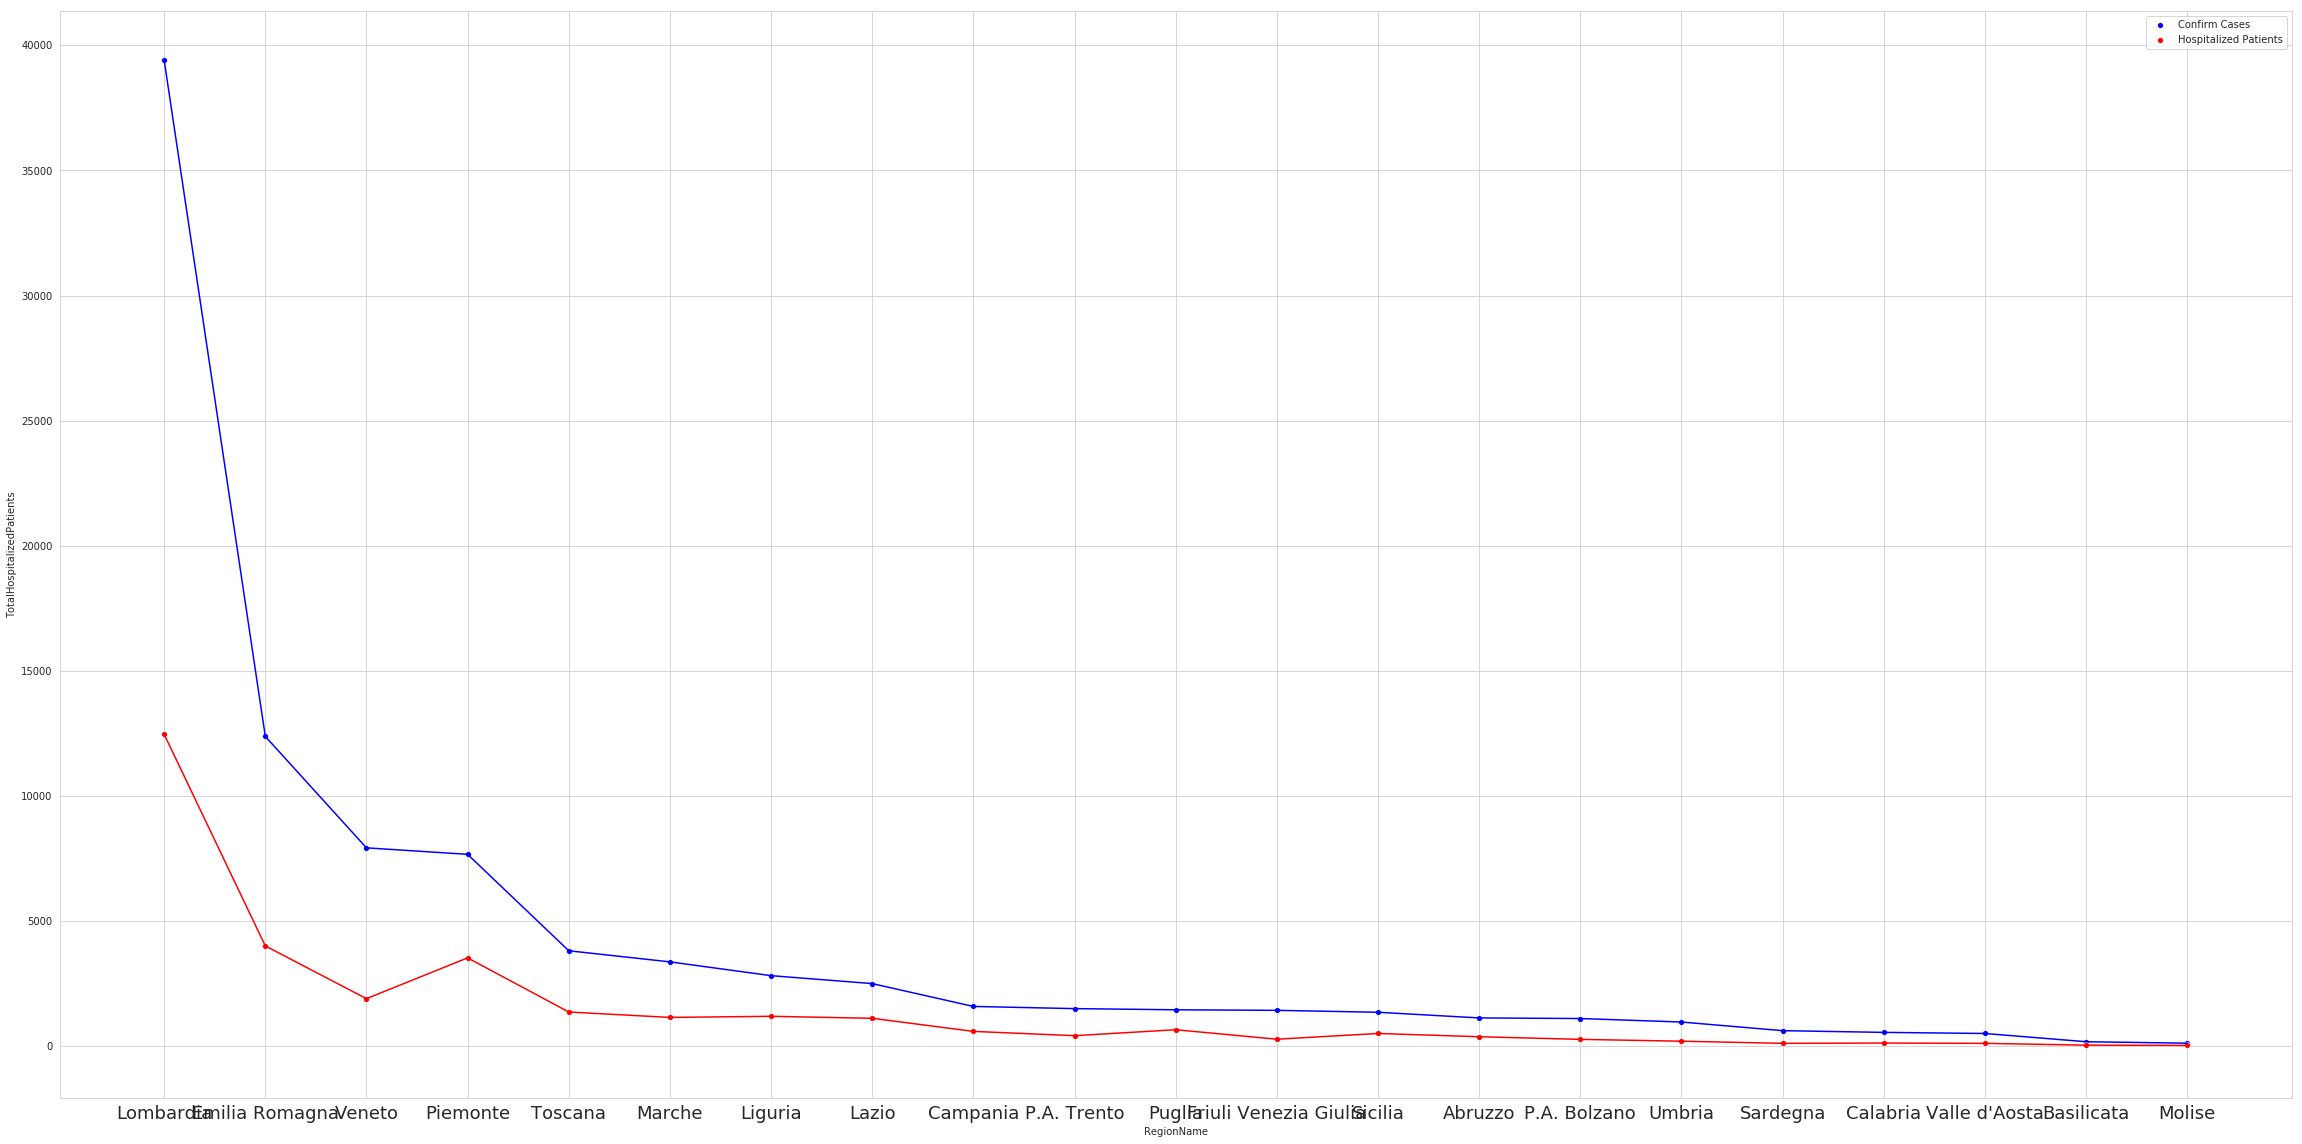

In [0]:
plt.figure(figsize=(23,10))
plt.bar(dgrs_el.RegionName, dgrs_el.TotalPositiveCases,label="Confirm Cases")
plt.bar(dgrs_el.RegionName, dgrs_el.TotalHospitalizedPatients,label="Hospitalized Patients")

plt.xlabel('Region')
plt.ylabel("Count")
plt.legend(frameon=True, fontsize=12)
plt.title('Confirm Cases vs People Hospitalised',fontsize= 35)
plt.show()

f, ax = plt.subplots(figsize=(40,20))

ax=sns.scatterplot(x="RegionName", y="TotalPositiveCases", data=dgrs_el,
             color="blue",label = "Confirm Cases")
ax=sns.scatterplot(x="RegionName", y="TotalHospitalizedPatients", data=dgrs_el,
             color="red",label = "Hospitalized Patients")
ax.xaxis.set_tick_params(labelsize=18)
plt.plot(dgrs_el.RegionName,dgrs_el.TotalPositiveCases,zorder=1,color="blue")
plt.plot(dgrs_el.RegionName,dgrs_el.TotalHospitalizedPatients,zorder=1,color="red")


**The graph shows statistical data direct from WHO. as the data says in Lombardia after 7,000 and more confirmed cases there are only approximately 4.5K people who are hospitalised. This has become a situation of crisis in italy. Hospital condition is becoming worse day by day. According to the doctors not every patient is getting proper and equal care and that is the main cause of multi fold spread of coronavirus. The whole country is locked down. Government has announced there will be no gathering, no sporting event and no travelling across the country just because of the high number of deaths in the country**

**Death and Recovery vs Region**

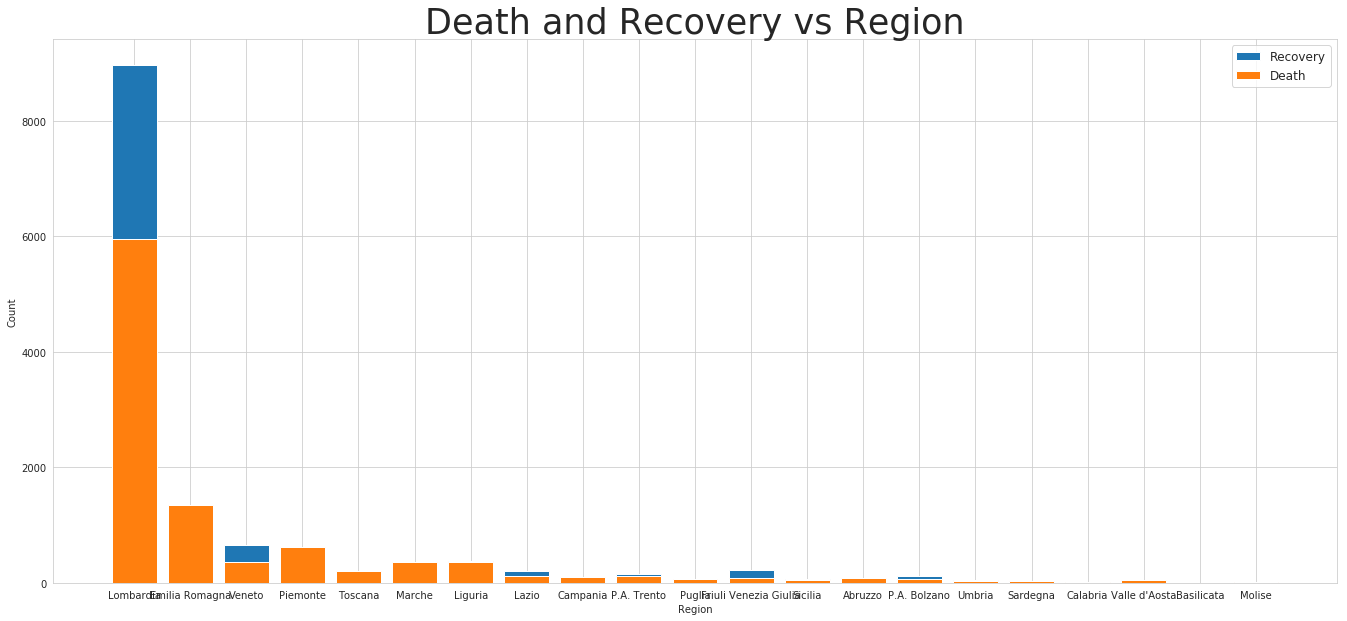

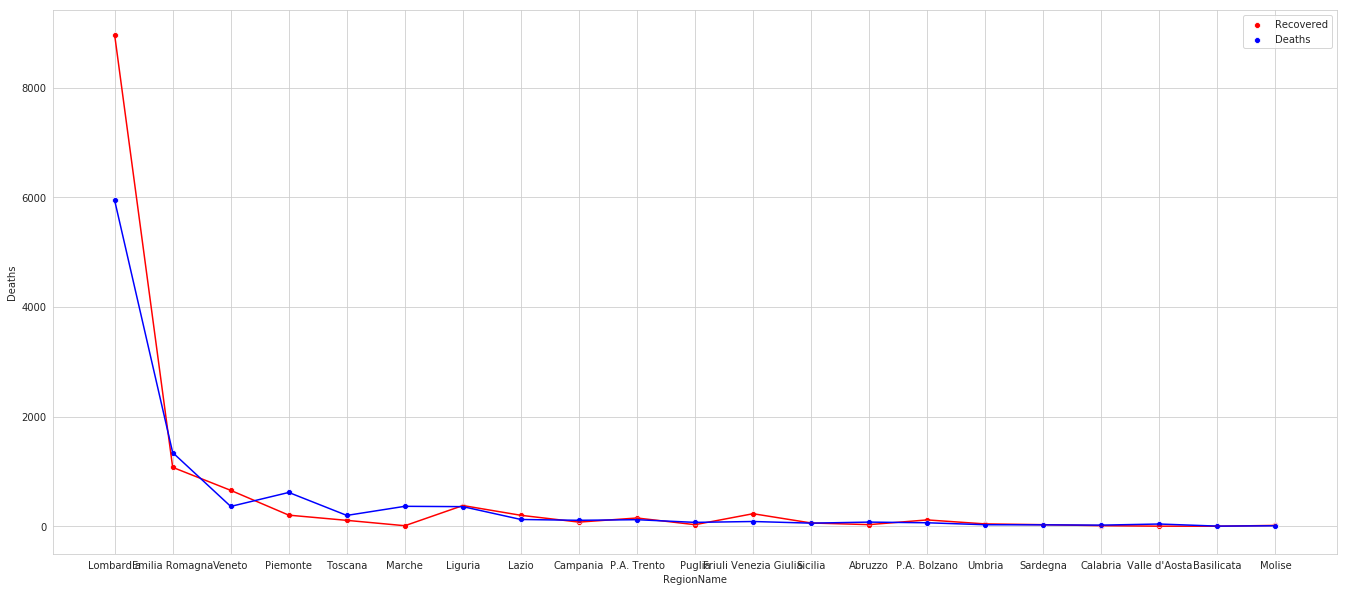

In [0]:
plt.figure(figsize=(23,10))
plt.bar(dgrs_el.RegionName, dgrs_el.Recovered,label="Recovery")
plt.bar(dgrs_el.RegionName, dgrs_el.Deaths,label="Death")
plt.xlabel('Region')
plt.ylabel("Count")
plt.legend(frameon=True, fontsize=12)
plt.title('Death and Recovery vs Region', fontsize= 35)
plt.show()

f, ax = plt.subplots(figsize=(23,10))
ax=sns.scatterplot(x="RegionName", y="Recovered", data=dgrs_el,
             color="red",label = "Recovered")
ax=sns.scatterplot(x="RegionName", y="Deaths", data=dgrs_el,
             color="blue",label = "Deaths")
plt.plot(dgrs_el.RegionName,dgrs_el.Recovered,zorder=1,color="red")
plt.plot(dgrs_el.RegionName,dgrs_el.Deaths,zorder=1,color="blue")

**According to the graph recovery rate of the patient is very slow. There are some common reasons behind the rapid increase in numbers of people infected through coronavirus. According to the data, the number of hospitalized people is far less than the number of people infected through novel-Coronavirus. According to the geographical structure of Italy In Europe the cases have now been confirmed in every member nation of the European Union. Italy will remain totally locked down as its healthcare system struggles to cope, on the other hand the nearby countries like Germany and France report alarming spikes in daily cases**

In [0]:
data['Date'] = pd.to_datetime(data['Date']).dt.normalize()
latest = data[data.Date == daily.Date.max()]

In [0]:
temp = latest.loc[:,['Date','HospitalizedPatients','IntensiveCarePatients','TotalHospitalizedPatients','HomeConfinement','Recovered','Deaths','TotalPositiveCases','TestsPerformed']]
temp.head()

,Date,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,Recovered,Deaths,TotalPositiveCases,TestsPerformed
693,2020-03-28,311,70,381,646,30,76,1133,7003
694,2020-03-28,26,19,45,133,1,3,182,1421
695,2020-03-28,225,51,276,653,116,64,1109,9168
696,2020-03-28,107,22,129,394,11,21,555,7760
697,2020-03-28,463,132,595,812,76,109,1592,10616


**Grouped by Provicne**

In [0]:
province.head()

,SNo,Date,Country,RegionCode,RegionName,ProvinceCode,ProvinceName,ProvinceAbbreviation,Latitude,Longitude,TotalPositiveCases
0,0,2020-02-24T18:00:00,ITA,13,Abruzzo,69,Chieti,CH,42.351032,14.167546,0
1,1,2020-02-24T18:00:00,ITA,13,Abruzzo,66,L'Aquila,AQ,42.351222,13.398438,0
2,2,2020-02-24T18:00:00,ITA,13,Abruzzo,68,Pescara,PE,42.464584,14.213648,0
3,3,2020-02-24T18:00:00,ITA,13,Abruzzo,67,Teramo,TE,42.658918,13.704400,0
4,4,2020-02-24T18:00:00,ITA,13,Abruzzo,979,In fase di definizione/aggiornamento,NaN,0.000000,0.000000,0


In [0]:
provincegrp = province.groupby("ProvinceName")[["TotalPositiveCases"]].max().reset_index()

In [0]:
fig = px.bar(provincegrp[['ProvinceName', 'TotalPositiveCases']].sort_values('TotalPositiveCases', ascending=False), 
             y="TotalPositiveCases", x="ProvinceName", color='ProvinceName', 
             log_y=True, template='ggplot2', title='Province vs Region')
fig.show()

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:243: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



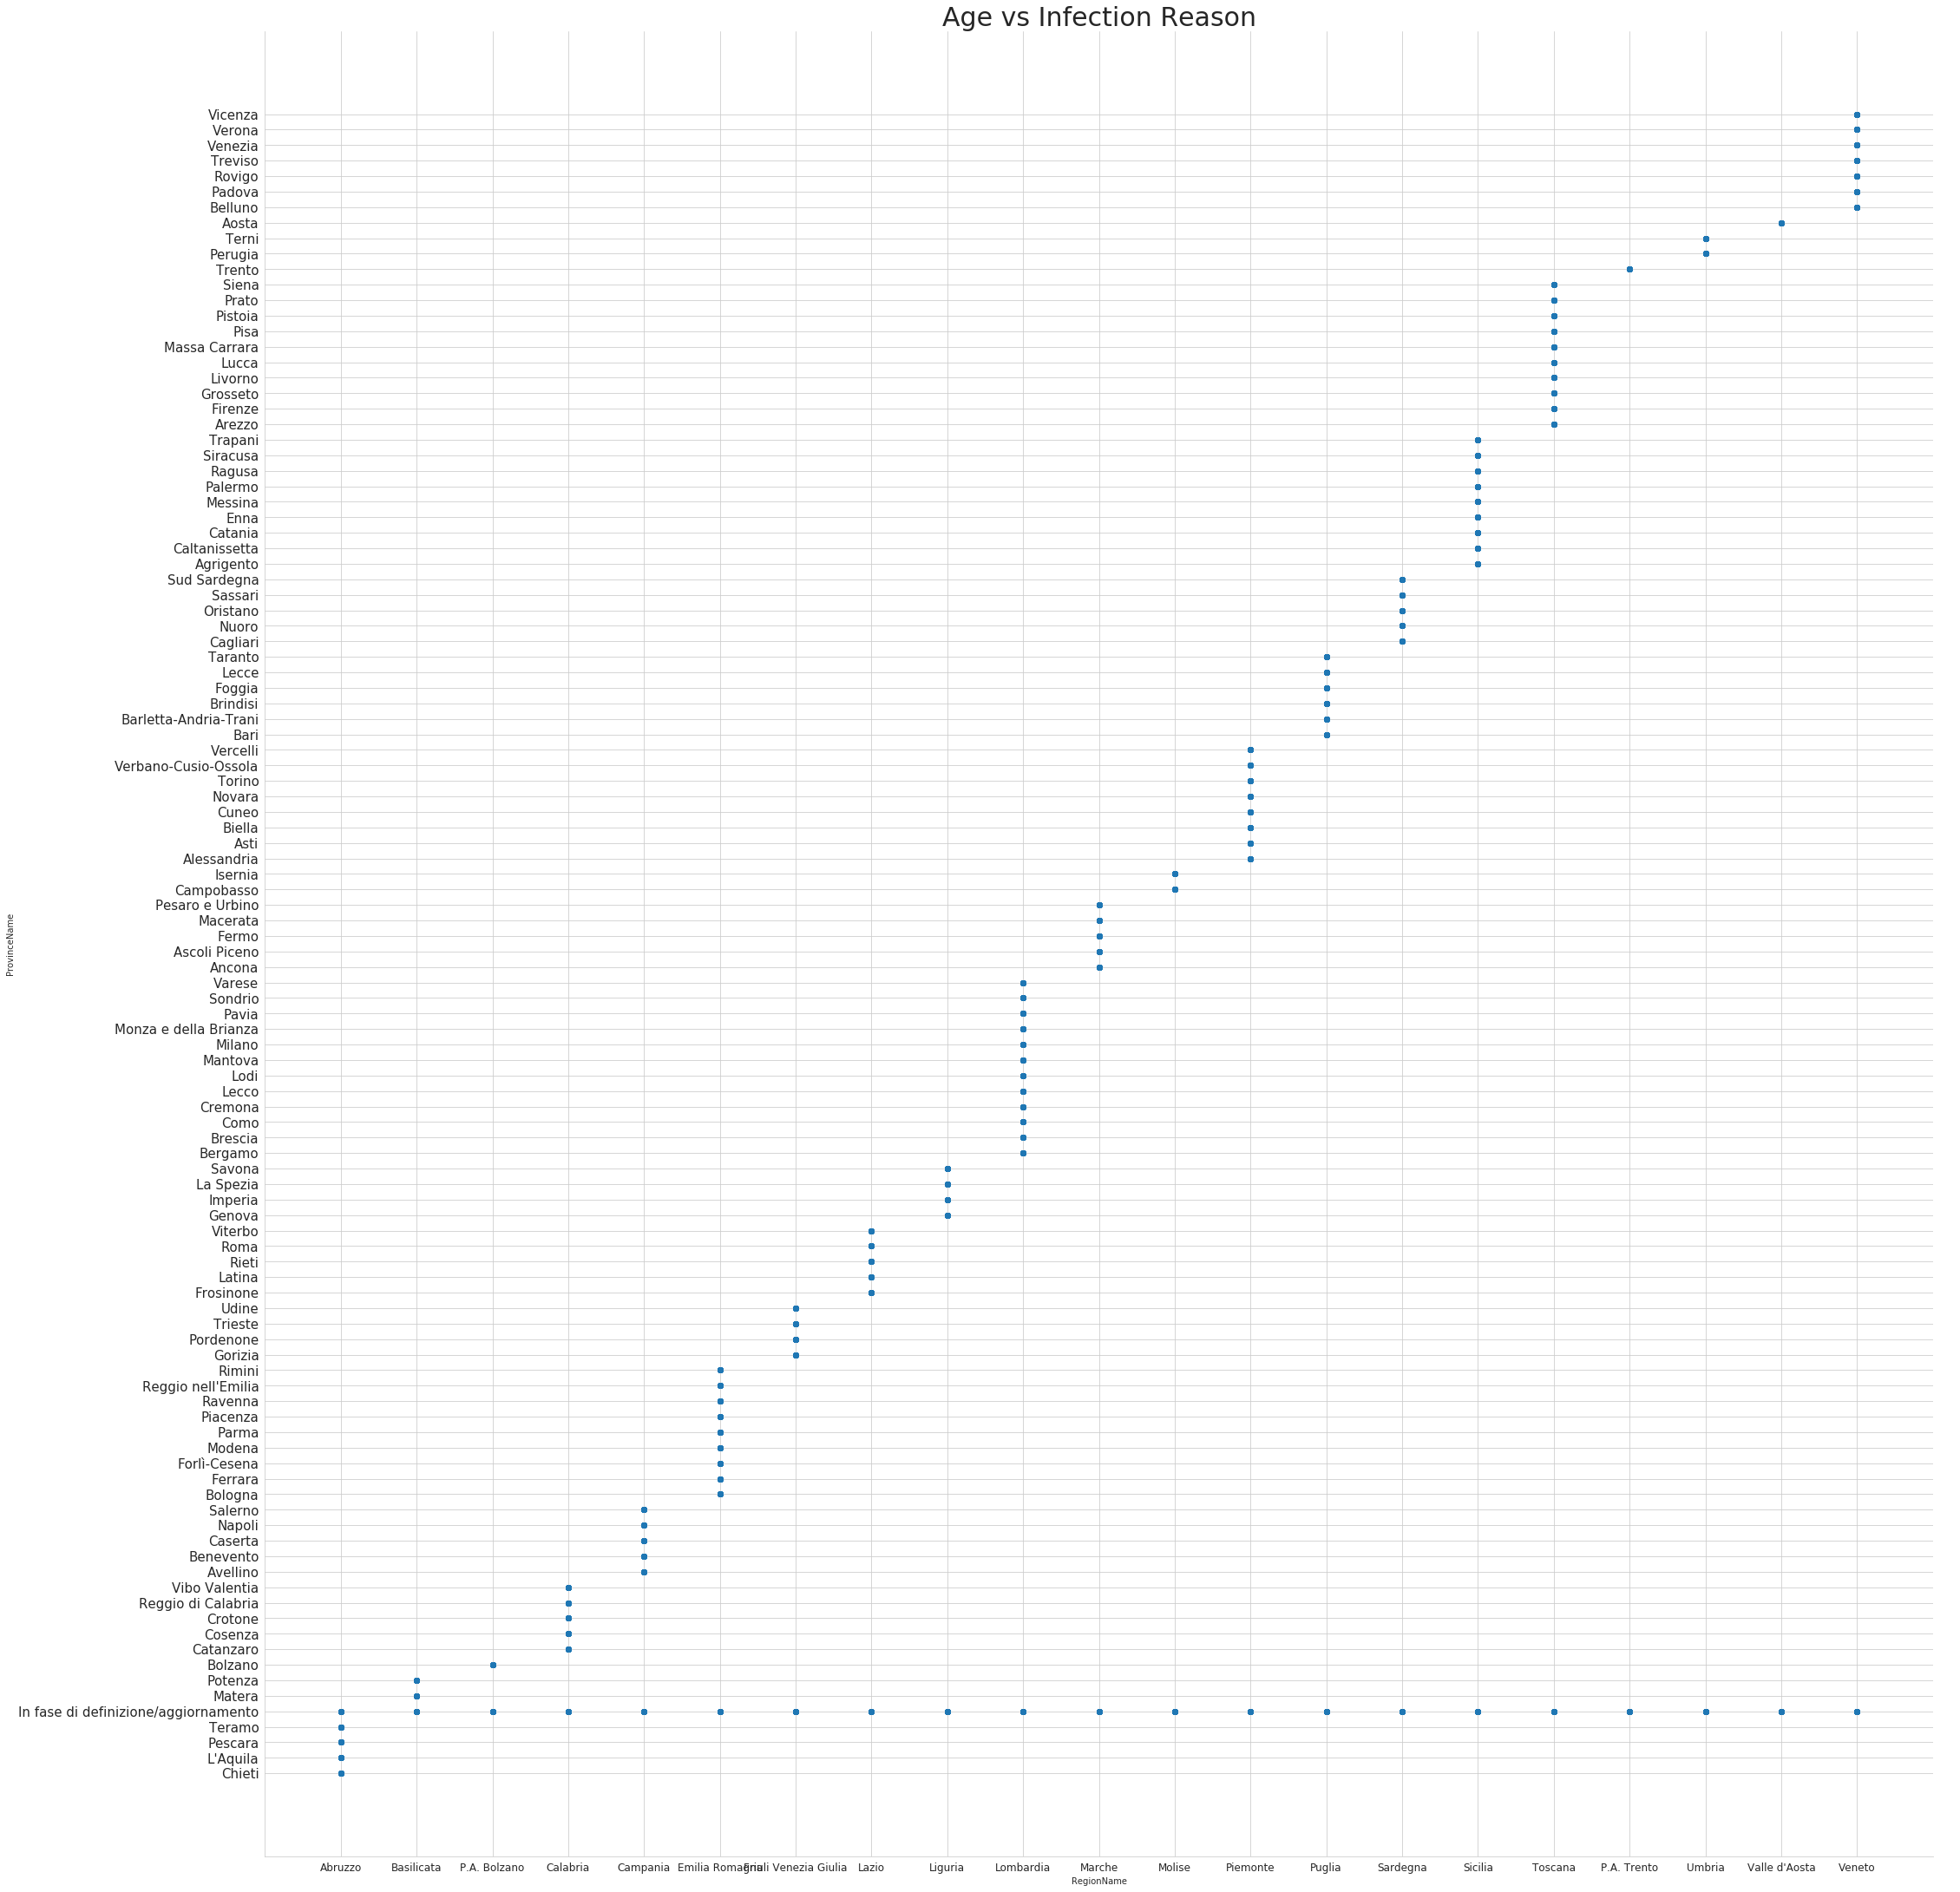

In [0]:
sns.set_style("whitegrid")
sns.FacetGrid(province,  size = 30)\
.map(plt.scatter, 'RegionName', 'ProvinceName')\
.add_legend()
plt.title('Age vs Infection Reason',fontsize=30)
plt.xticks(fontsize=12)
plt.yticks(fontsize=15)
plt.show()

**Descipiton of Data grouped by Date**

In [0]:
temp.describe().T

,count,mean,std,min,25%,50%,75%,max
HospitalizedPatients,21.0,1270.285714,2464.149045,26.0,159.0,441.0,1031.0,11152.0
IntensiveCarePatients,21.0,183.619048,286.771595,9.0,44.0,72.0,167.0,1319.0
TotalHospitalizedPatients,21.0,1453.904762,2746.264752,35.0,203.0,512.0,1198.0,12471.0
HomeConfinement,21.0,1882.523810,2800.170024,63.0,646.0,811.0,1846.0,12038.0
Recovered,21.0,589.714286,1935.688718,1.0,29.0,76.0,203.0,8962.0
Deaths,21.0,477.285714,1289.113926,3.0,41.0,87.0,358.0,5944.0
TotalPositiveCases,21.0,4403.428571,8593.297013,123.0,969.0,1458.0,3373.0,39415.0
TestsPerformed,21.0,20453.619048,27762.134541,807.0,7003.0,9884.0,21511.0,102503.0


In [0]:
data_groupby_date = latest.groupby("Date")[['Date','HospitalizedPatients','IntensiveCarePatients','TotalHospitalizedPatients','HomeConfinement','Recovered','Deaths','TotalPositiveCases','TestsPerformed']].sum().reset_index()
data_groupby_date

,Date,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,Recovered,Deaths,TotalPositiveCases,TestsPerformed
0,2020-03-28,26676,3856,30532,39533,12384,10023,92472,429526


**Ratio and percentage of Confirmation, Deaths and Deaths, Recovery after Confirmation**

In [0]:
ps_ts = float(data_groupby_date.TotalPositiveCases/data_groupby_date.TestsPerformed)
d_ts = float(data_groupby_date.Deaths/data_groupby_date.TestsPerformed)
r_ps = float(data_groupby_date.Recovered/data_groupby_date.TotalPositiveCases)
d_ps = float(data_groupby_date.Deaths/data_groupby_date.TotalPositiveCases)

In [0]:
print("The percentage of Confirmation is "+ str(ps_ts*100) )
print("The percentage of Death is "+ str(d_ts*100) )
print("The percentage of Death after confirmation is "+ str(d_ps*100) )
print("The percentage of recovery after confirmation is "+ str(r_ps*100) )

The percentage of Confirmation is 21.528848079045275
The percentage of Death is 2.3335025120714463
The percentage of Death after confirmation is 10.838956657150273
The percentage of recovery after confirmation is 13.392161951725928


In [0]:
data_groupby_date1 = data.groupby("Date")[['TotalPositiveCases', 'Deaths', 'Recovered','TestsPerformed','HospitalizedPatients','TotalHospitalizedPatients']].sum().reset_index()
dgd3 = data_groupby_date1
dgd3.head()

,Date,TotalPositiveCases,Deaths,Recovered,TestsPerformed,HospitalizedPatients,TotalHospitalizedPatients
0,2020-02-24,229,7,1,4324,101,127
1,2020-02-25,322,10,1,8623,114,150
2,2020-02-26,400,12,3,9587,128,164
3,2020-02-27,650,17,45,12014,248,304
4,2020-02-28,888,21,46,15695,345,409


In [0]:
dgd2 = dgd3

In [0]:
dgd2["Date"]= dgd3["Date"].dt.strftime("%d-%m-%y") 
dgd2.head()

,Date,TotalPositiveCases,Deaths,Recovered,TestsPerformed,HospitalizedPatients,TotalHospitalizedPatients
0,24-02-20,229,7,1,4324,101,127
1,25-02-20,322,10,1,8623,114,150
2,26-02-20,400,12,3,9587,128,164
3,27-02-20,650,17,45,12014,248,304
4,28-02-20,888,21,46,15695,345,409


**Test vs Confirmed**


In [0]:
dgd2 = dgd2.tail(14)

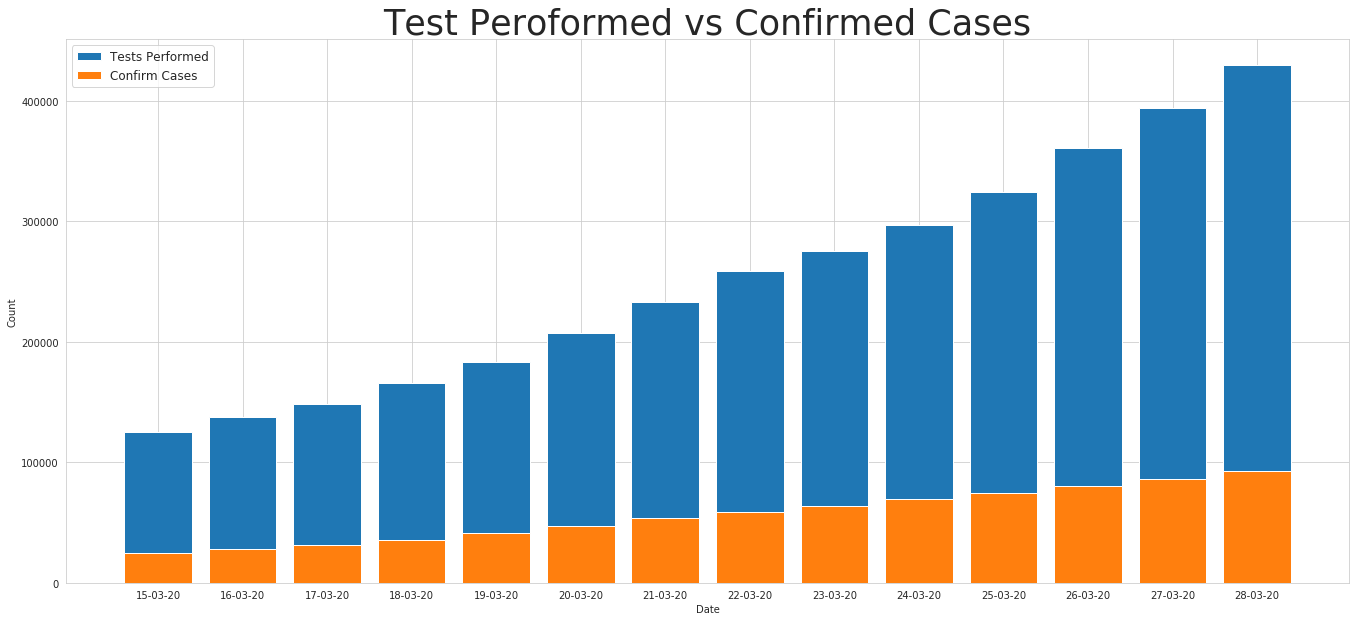

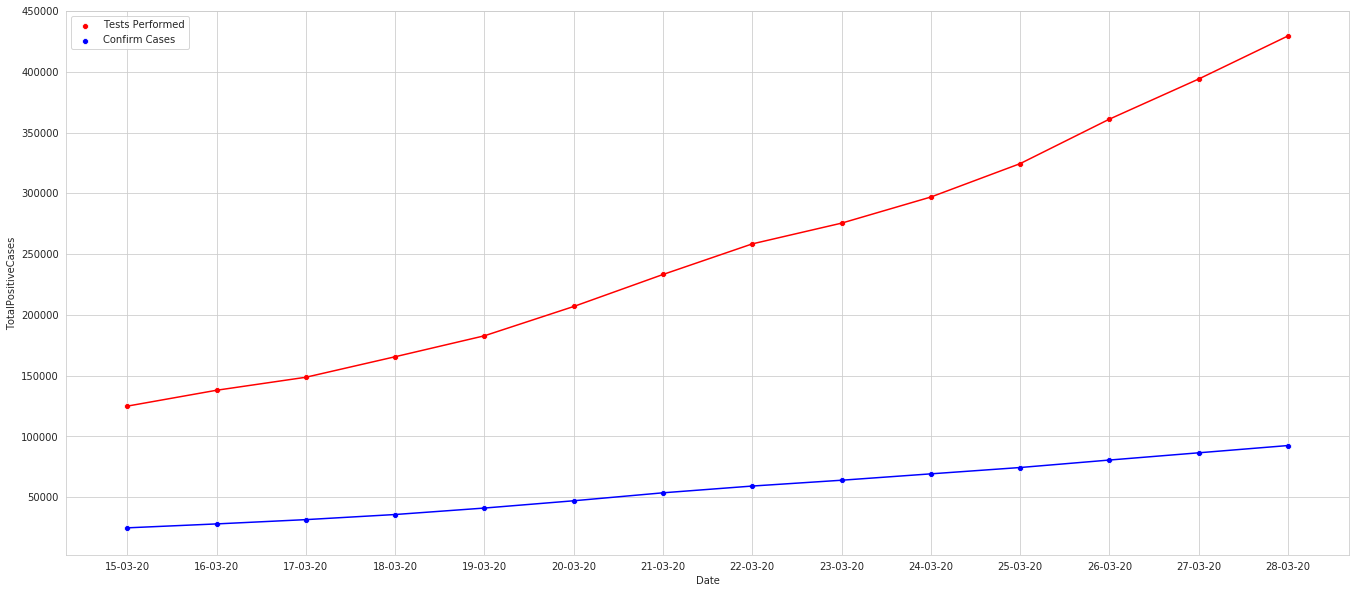

In [0]:
plt.figure(figsize=(23,10))
plt.bar(dgd2.Date, dgd2.TestsPerformed,label="Tests Performed")
plt.bar(dgd2.Date, dgd2.TotalPositiveCases,label="Confirm Cases")
plt.xlabel('Date')
plt.ylabel("Count")
plt.legend(frameon=True, fontsize=12)
plt.title('Test Peroformed vs Confirmed Cases',fontsize = 35)
plt.show()

f, ax = plt.subplots(figsize=(23,10))
ax=sns.scatterplot(x="Date", y="TestsPerformed", data=dgd2,
             color="red",label = "Tests Performed")
ax=sns.scatterplot(x="Date", y="TotalPositiveCases", data=dgd2,
             color="blue",label = "Confirm Cases")
plt.plot(dgd2.Date,dgd2.TestsPerformed,zorder=1,color="red")
plt.plot(dgd2.Date,dgd2.TotalPositiveCases,zorder=1,color="blue")

**Confirmed cases vs People Hospitalised**

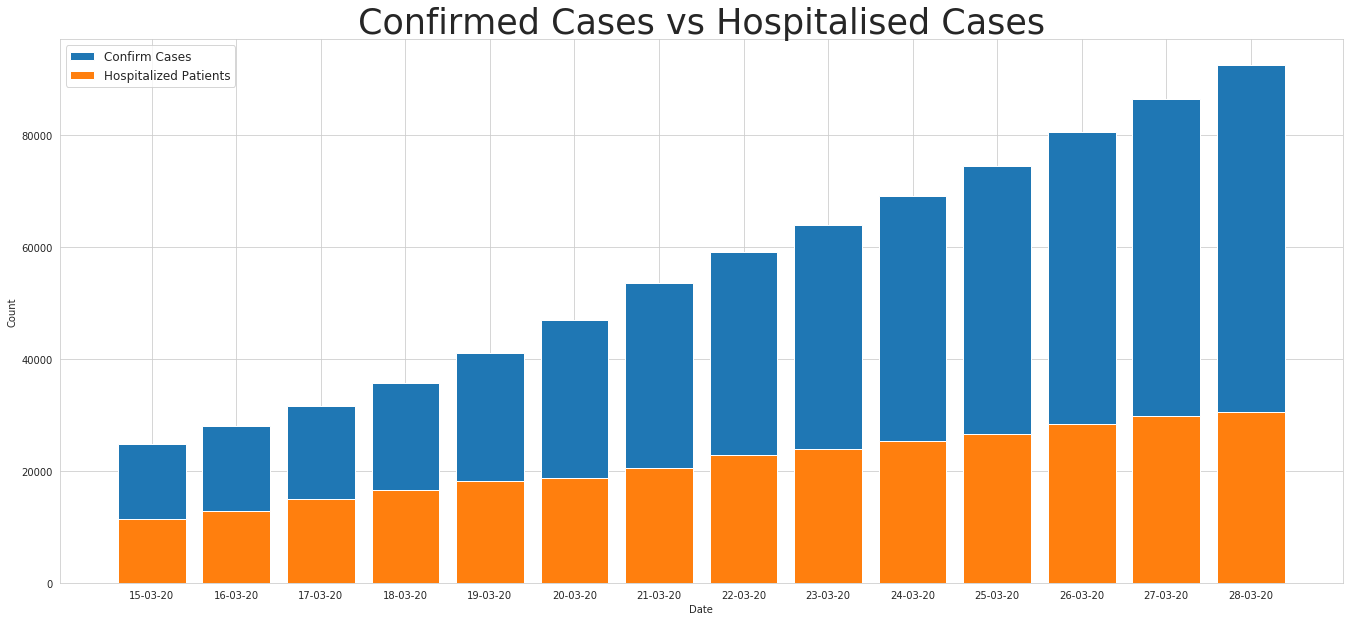

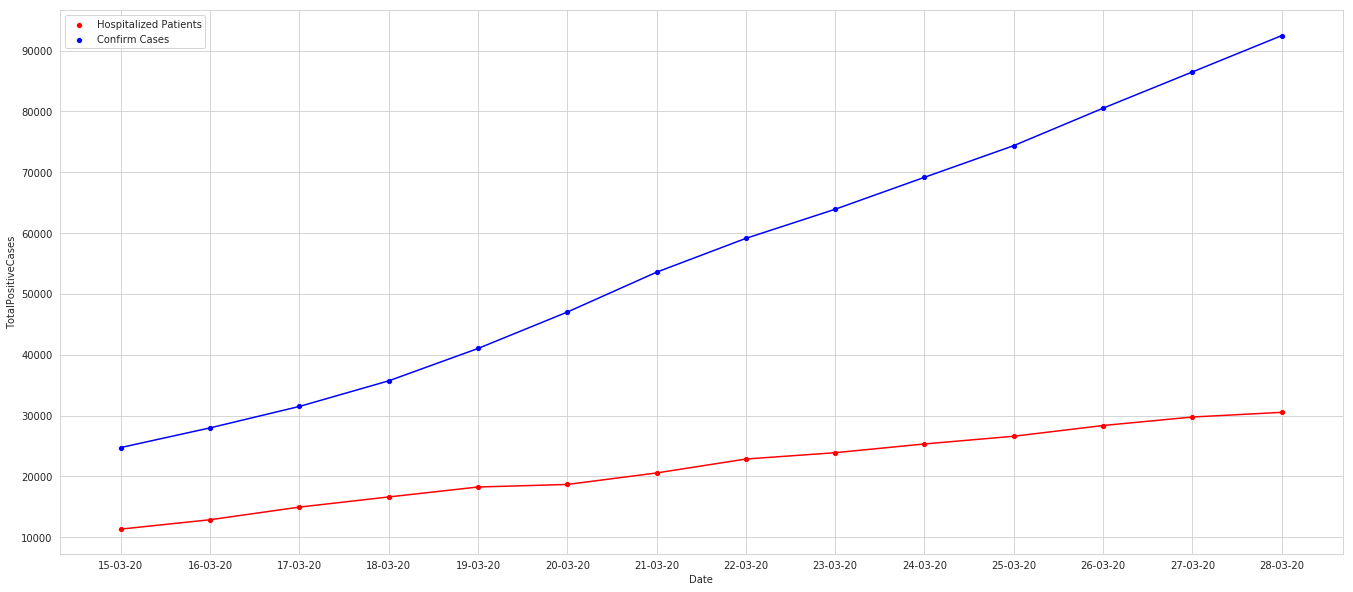

In [0]:
plt.figure(figsize=(23,10))
plt.bar(dgd2.Date, dgd2.TotalPositiveCases,label="Confirm Cases")
plt.bar(dgd2.Date, dgd2.TotalHospitalizedPatients,label="Hospitalized Patients")
plt.xlabel('Date')
plt.ylabel("Count")
plt.legend(frameon=True, fontsize=12)
plt.title('Confirmed Cases vs Hospitalised Cases',fontsize= 35)
plt.show()

f, ax = plt.subplots(figsize=(23,10))
ax=sns.scatterplot(x="Date", y="TotalHospitalizedPatients", data=dgd2,
             color="red",label = "Hospitalized Patients")
ax=sns.scatterplot(x="Date", y="TotalPositiveCases", data=dgd2,
             color="blue",label = "Confirm Cases")
plt.plot(dgd2.Date,dgd2.TotalHospitalizedPatients,zorder=1,color="red")
plt.plot(dgd2.Date,dgd2.TotalPositiveCases,zorder=1,color="blue")

**Hospitalise vs Recevery and Death**

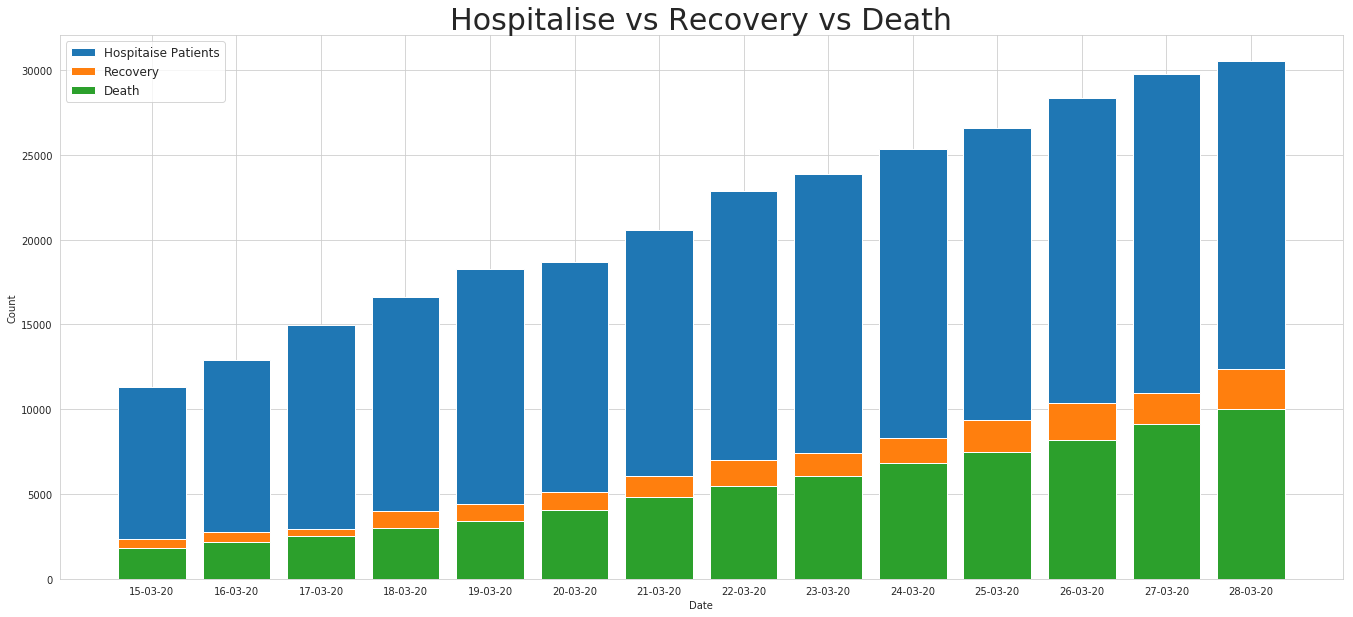

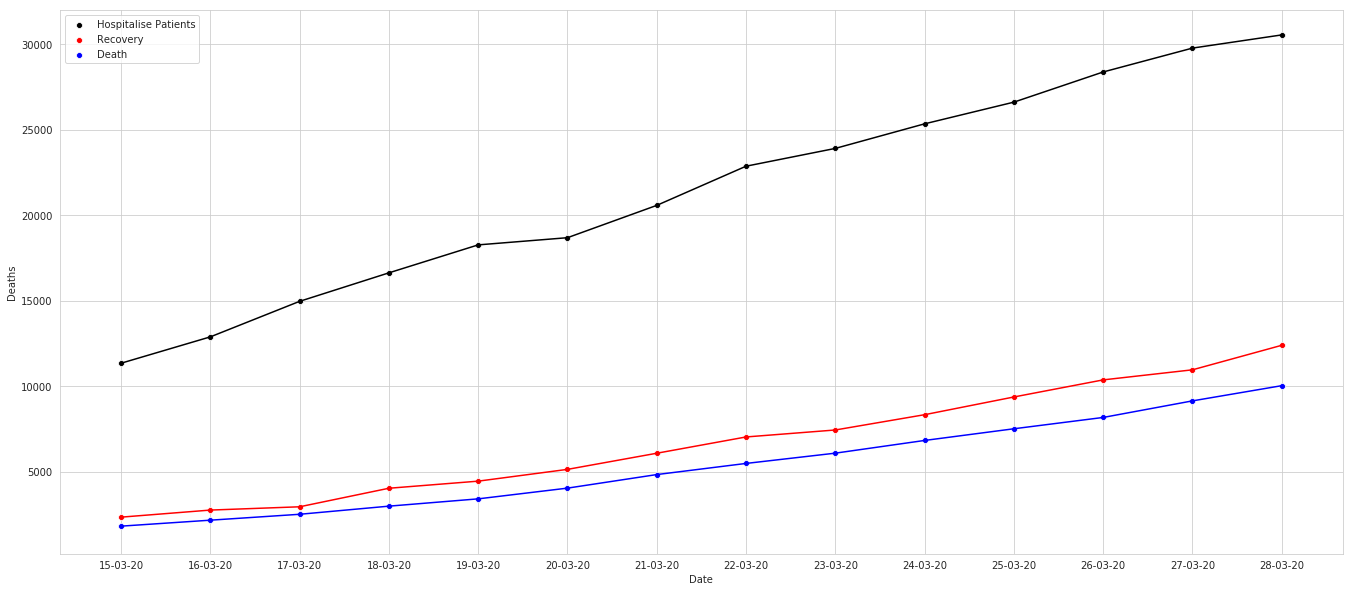

In [0]:
plt.figure(figsize=(23,10))
plt.bar(dgd2.Date, dgd2.TotalHospitalizedPatients,label="Hospitaise Patients")
plt.bar(dgd2.Date, dgd2.Recovered,label="Recovery")
plt.bar(dgd2.Date, dgd2.Deaths,label="Death")
plt.xlabel('Date')
plt.ylabel("Count")
plt.legend(frameon=True, fontsize=12)
plt.title('Hospitalise vs Recovery vs Death',fontsize=30)
plt.show()

f, ax = plt.subplots(figsize=(23,10))
ax=sns.scatterplot(x="Date", y="TotalHospitalizedPatients", data=dgd2,
             color="black",label = "Hospitalise Patients")
ax=sns.scatterplot(x="Date", y="Recovered", data=dgd2,
             color="red",label = "Recovery")
ax=sns.scatterplot(x="Date", y="Deaths", data=dgd2,
             color="blue",label = "Death")
plt.plot(dgd2.Date,dgd2.TotalHospitalizedPatients,zorder=1,color="black")
plt.plot(dgd2.Date,dgd2.Recovered,zorder=1,color="red")
plt.plot(dgd2.Date,dgd2.Deaths,zorder=1,color="blue")

**Confirm vs Recovery vs Death**

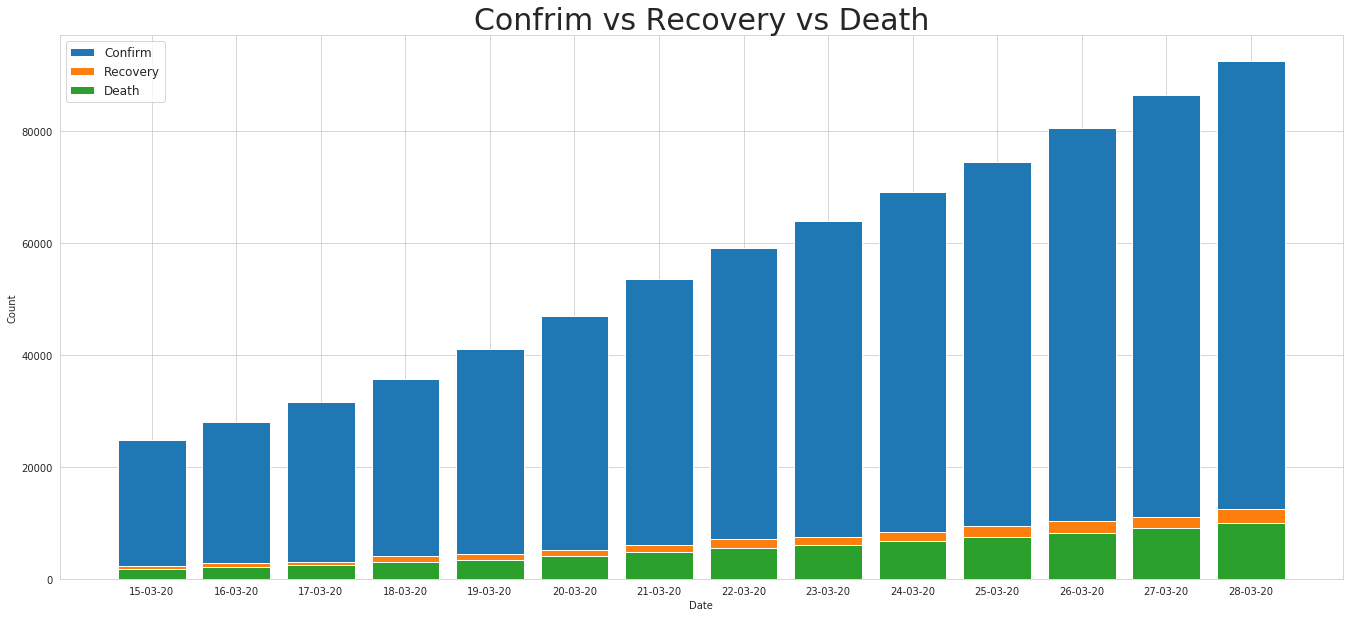

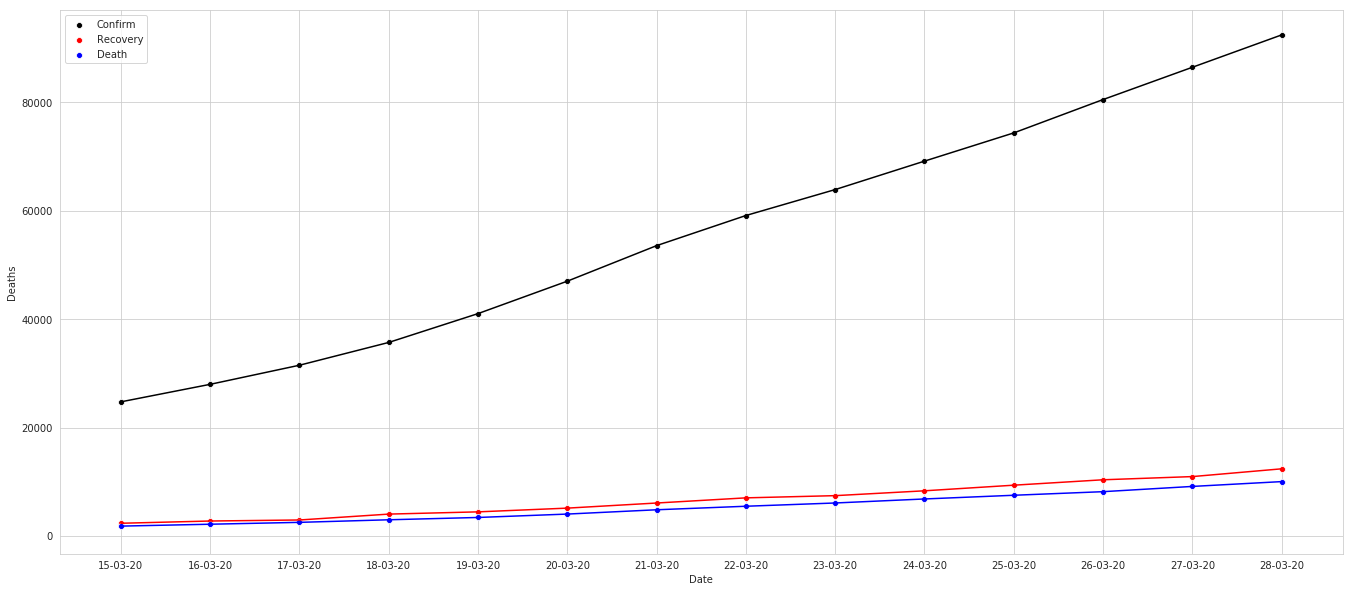

In [0]:
plt.figure(figsize=(23,10))
plt.bar(dgd2.Date, dgd2.TotalPositiveCases,label="Confirm")
plt.bar(dgd2.Date, dgd2.Recovered,label="Recovery")
plt.bar(dgd2.Date, dgd2.Deaths,label="Death")
plt.xlabel('Date')
plt.ylabel("Count")
plt.legend(frameon=True, fontsize=12)
plt.title('Confrim vs Recovery vs Death',fontsize=30)
plt.show()

f, ax = plt.subplots(figsize=(23,10))
ax=sns.scatterplot(x="Date", y="TotalPositiveCases", data=dgd2,
             color="black",label = "Confirm")
ax=sns.scatterplot(x="Date", y="Recovered", data=dgd2,
             color="red",label = "Recovery")
ax=sns.scatterplot(x="Date", y="Deaths", data=dgd2,
             color="blue",label = "Death")
plt.plot(dgd2.Date,dgd2.TotalPositiveCases,zorder=1,color="black")
plt.plot(dgd2.Date,dgd2.Recovered,zorder=1,color="red")
plt.plot(dgd2.Date,dgd2.Deaths,zorder=1,color="blue")

**This graph gives an overview of the current situation of italy. There are more than 12,000 confirmed cases now. There is approximately equal number of deaths as of recovery. From the date the country has confirmed its first case of positive coronavirus it has been increasing exponentially. Till the date 11,Mar italy has become the second most infected country after China.**

In [0]:
data_groupby_date1 = data.groupby("Date")[['TotalPositiveCases', 'Deaths', 'Recovered','TestsPerformed','HospitalizedPatients','TotalHospitalizedPatients']].sum().reset_index()
dgd1 = data_groupby_date1
dgd1.head()

,Date,TotalPositiveCases,Deaths,Recovered,TestsPerformed,HospitalizedPatients,TotalHospitalizedPatients
0,2020-02-24,229,7,1,4324,101,127
1,2020-02-25,322,10,1,8623,114,150
2,2020-02-26,400,12,3,9587,128,164
3,2020-02-27,650,17,45,12014,248,304
4,2020-02-28,888,21,46,15695,345,409


> **Prophet  Algorithm**

For Number of Test(Screening)

In [0]:
pr_data_test = dgd1.loc[:,['Date','TestsPerformed']]
pr_data_test.columns = ['ds','y']
pr_data_test.head()

,ds,y
0,2020-02-24,4324
1,2020-02-25,8623
2,2020-02-26,9587
3,2020-02-27,12014
4,2020-02-28,15695


**Modeling**

In [0]:
m = Prophet()
m.fit(pr_data_test)
future=m.make_future_dataframe(periods=15)
forecast_test=m.predict(future)
forecast_test

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-02-24,7273.803585,1793.715644,8571.083238,7273.803585,7273.803585,-1919.377920,-1919.377920,-1919.377920,-1919.377920,-1919.377920,-1919.377920,0.0,0.0,0.0,5354.425665
1,2020-02-25,9335.766095,1810.604075,8853.464662,9335.766095,9335.766095,-4212.532222,-4212.532222,-4212.532222,-4212.532222,-4212.532222,-4212.532222,0.0,0.0,0.0,5123.233873
2,2020-02-26,11397.728589,4528.642603,11127.675287,11397.728589,11397.728589,-3571.113803,-3571.113803,-3571.113803,-3571.113803,-3571.113803,-3571.113803,0.0,0.0,0.0,7826.614785
3,2020-02-27,13459.691103,8966.947228,15862.841764,13459.691103,13459.691103,-941.204183,-941.204183,-941.204183,-941.204183,-941.204183,-941.204183,0.0,0.0,0.0,12518.486920
4,2020-02-28,15521.653758,13797.533759,20775.965022,15521.653758,15521.653758,1808.083845,1808.083845,1808.083845,1808.083845,1808.083845,1808.083845,0.0,0.0,0.0,17329.737602
5,2020-02-29,17584.859859,19812.516698,26851.622033,17584.859859,17584.859859,5724.176084,5724.176084,5724.176084,5724.176084,5724.176084,5724.176084,0.0,0.0,0.0,23309.035943
6,2020-03-01,20600.011687,20301.975244,27266.068870,20600.011687,20600.011687,3111.968200,3111.968200,3111.968200,3111.968200,3111.968200,3111.968200,0.0,0.0,0.0,23711.979886
7,2020-03-02,23616.596806,18223.198337,25117.672255,23616.596806,23616.596806,-1919.377920,-1919.377920,-1919.377920,-1919.377920,-1919.377920,-1919.377920,0.0,0.0,0.0,21697.218887
8,2020-03-03,26633.181947,19153.568581,25896.262249,26633.181947,26633.181947,-4212.532222,-4212.532222,-4212.532222,-4212.532222,-4212.532222,-4212.532222,0.0,0.0,0.0,22420.649724
9,2020-03-04,29649.767101,22732.009445,29545.411507,29649.767101,29649.767101,-3571.113803,-3571.113803,-3571.113803,-3571.113803,-3571.113803,-3571.113803,0.0,0.0,0.0,26078.653297


**Predicting**

In [0]:
test = forecast_test.loc[:,['ds','trend']]
test = test[test['trend']>0]
test.head()
test=test.tail(15)
test.columns = ['Date','Screening']
test.head()


,Date,Screening
34,2020-03-29,444988.177387
35,2020-03-30,472550.551714
36,2020-03-31,500112.926042
37,2020-04-01,527675.300369
38,2020-04-02,555237.674696


**Graphical Representation of Predicted Screening**

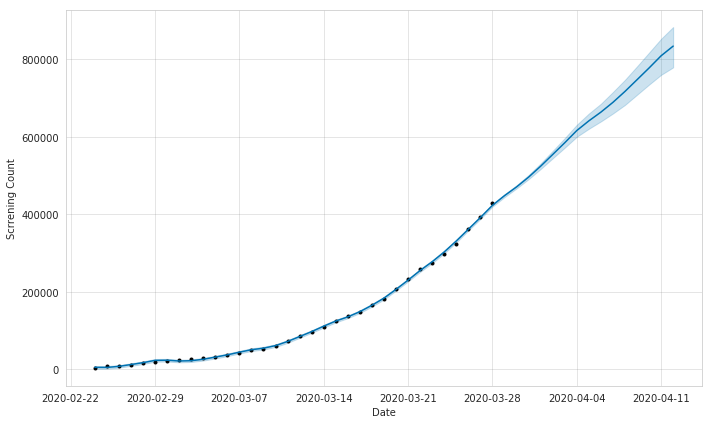

In [0]:
fig_test = plot_plotly(m, forecast_test)
py.iplot(fig_test) 

fig_test = m.plot(forecast_test,xlabel='Date',ylabel='Scrrening Count')

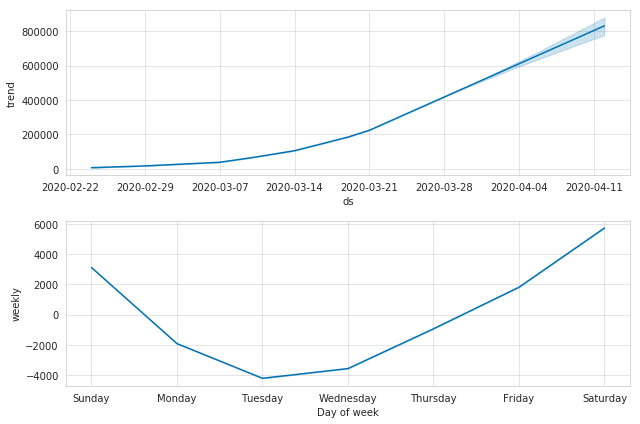

In [0]:
figure_test=m.plot_components(forecast_test)


**The graph predicts the total number of screening required to take the condition of Italy under control. When there will be more than 14Lakhs of screening till Mar,2021 then the situation will be under control. As the graph is linear so European governments are supposed to work accordingly.**

**Confirmed Cases**

**Making Data ready for algorithm**

In [0]:
pr_data_cm = dgd1.loc[:,['Date','TotalPositiveCases']]
pr_data_cm.columns = ['ds','y']
pr_data_cm.head()

,ds,y
0,2020-02-24,229
1,2020-02-25,322
2,2020-02-26,400
3,2020-02-27,650
4,2020-02-28,888


**Modelling**

In [0]:
m=Prophet()
m.fit(pr_data_cm)
future=m.make_future_dataframe(periods=15)
forecast_cm=m.predict(future)
forecast_cm

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-02-24,240.622639,182.835475,410.904206,240.622639,240.622639,46.373827,46.373827,46.373827,46.373827,46.373827,46.373827,0.0,0.0,0.0,286.996466
1,2020-02-25,680.907157,145.123031,383.216899,680.907157,680.907157,-417.089956,-417.089956,-417.089956,-417.089956,-417.089956,-417.089956,0.0,0.0,0.0,263.817201
2,2020-02-26,1004.044193,274.040389,503.987944,1004.044193,1004.044193,-618.133869,-618.133869,-618.133869,-618.133869,-618.133869,-618.133869,0.0,0.0,0.0,385.910324
3,2020-02-27,867.054080,534.192637,758.637779,867.054080,867.054080,-215.219064,-215.219064,-215.219064,-215.219064,-215.219064,-215.219064,0.0,0.0,0.0,651.835016
4,2020-02-28,729.565632,691.758157,919.452224,729.565632,729.565632,82.285883,82.285883,82.285883,82.285883,82.285883,82.285883,0.0,0.0,0.0,811.851516
5,2020-02-29,591.895832,1099.628471,1329.065398,591.895832,591.895832,624.646466,624.646466,624.646466,624.646466,624.646466,624.646466,0.0,0.0,0.0,1216.542297
6,2020-03-01,1233.872221,1620.850613,1848.729026,1233.872221,1233.872221,497.136712,497.136712,497.136712,497.136712,497.136712,497.136712,0.0,0.0,0.0,1731.008933
7,2020-03-02,2034.139028,1969.088255,2195.526833,2034.139028,2034.139028,46.373827,46.373827,46.373827,46.373827,46.373827,46.373827,0.0,0.0,0.0,2080.512854
8,2020-03-03,2834.405839,2311.839631,2536.536179,2834.405839,2834.405839,-417.089956,-417.089956,-417.089956,-417.089956,-417.089956,-417.089956,0.0,0.0,0.0,2417.315883
9,2020-03-04,3633.061192,2894.586718,3130.914426,3633.061192,3633.061192,-618.133869,-618.133869,-618.133869,-618.133869,-618.133869,-618.133869,0.0,0.0,0.0,3014.927324


**Predicting**

In [0]:
cnfrm = forecast_cm.loc[:,['ds','trend']]
cnfrm = cnfrm[cnfrm['trend']>0]
cnfrm=cnfrm.tail(15)
cnfrm.columns = ['Date','Confirm']
cnfrm.head()

,Date,Confirm
34,2020-03-29,97448.196127
35,2020-03-30,103020.779873
36,2020-03-31,108593.363619
37,2020-04-01,114165.947366
38,2020-04-02,119738.531112


**Graphical Representation of Predicted Confiramtion**

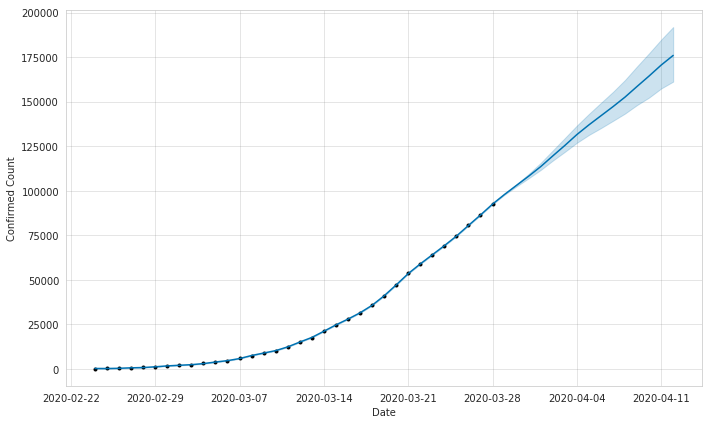

In [0]:
fig_cm = plot_plotly(m, forecast_cm)
py.iplot(fig_cm) 

fig_cm = m.plot(forecast_cm,xlabel='Date',ylabel='Confirmed Count')

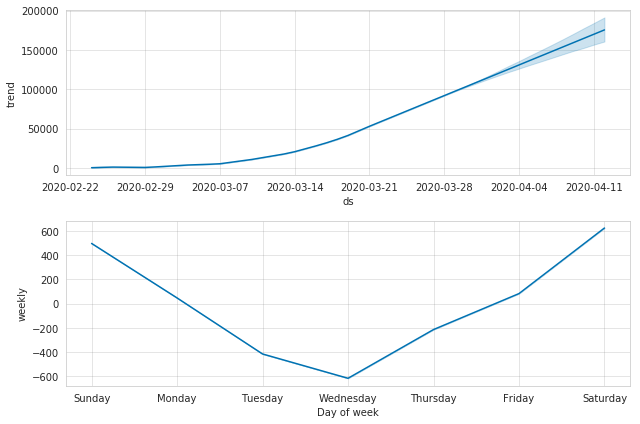

In [0]:
figure_cm=m.plot_components(forecast_cm)


Predicting the number of cases confirmed in Italy till Feb, 2021. Therewill be more than 2.5 Lakhs people who will be affected by coronavirus.

**Recovery**

**Making Data Ready for algorithm**

In [0]:
pr_data_r = dgd1.loc[:,['Date','Recovered']]
pr_data_r.columns = ['ds','y']
pr_data_r.head()

,ds,y
0,2020-02-24,1
1,2020-02-25,1
2,2020-02-26,3
3,2020-02-27,45
4,2020-02-28,46


**Modelling**

In [0]:
m=Prophet()
m.fit(pr_data_r)
future=m.make_future_dataframe(periods=15)
forecast_r=m.predict(future)
forecast_r

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-02-24,-2461.181817,-4343.608406,-295.945911,-2461.181817,-2461.181817,3.747761,3.747761,3.747761,3.747761,3.747761,3.747761,0.0,0.0,0.0,-2457.434056
1,2020-02-25,-2127.862226,-4157.523012,-96.185924,-2127.862226,-2127.862226,-54.451327,-54.451327,-54.451327,-54.451327,-54.451327,-54.451327,0.0,0.0,0.0,-2182.313553
2,2020-02-26,-1794.542635,-3874.831990,295.059728,-1794.542635,-1794.542635,67.716018,67.716018,67.716018,67.716018,67.716018,67.716018,0.0,0.0,0.0,-1726.826616
3,2020-02-27,-1461.223044,-3348.535563,667.016773,-1461.223044,-1461.223044,95.458864,95.458864,95.458864,95.458864,95.458864,95.458864,0.0,0.0,0.0,-1365.764180
4,2020-02-28,-1127.903454,-3106.417126,1102.322263,-1127.903454,-1127.903454,75.574973,75.574973,75.574973,75.574973,75.574973,75.574973,0.0,0.0,0.0,-1052.328481
5,2020-02-29,-794.583865,-2531.477348,1710.908090,-794.583865,-794.583865,336.661294,336.661294,336.661294,336.661294,336.661294,336.661294,0.0,0.0,0.0,-457.922571
6,2020-03-01,-461.264274,-3132.187152,1079.499230,-461.264274,-461.264274,-524.707584,-524.707584,-524.707584,-524.707584,-524.707584,-524.707584,0.0,0.0,0.0,-985.971858
7,2020-03-02,-127.944683,-2076.797682,1874.699960,-127.944683,-127.944683,3.747761,3.747761,3.747761,3.747761,3.747761,3.747761,0.0,0.0,0.0,-124.196922
8,2020-03-03,205.374910,-1918.700703,2140.432195,205.374910,205.374910,-54.451327,-54.451327,-54.451327,-54.451327,-54.451327,-54.451327,0.0,0.0,0.0,150.923583
9,2020-03-04,538.694502,-1265.296974,2664.881492,538.694502,538.694502,67.716018,67.716018,67.716018,67.716018,67.716018,67.716018,0.0,0.0,0.0,606.410520


**Predicting**

In [0]:
rec = forecast_r.loc[:,['ds','trend']]
rec = rec[rec['trend']>0]
rec=rec.tail(15)
rec.columns = ['Date','Recovery']
rec.head()

,Date,Recovery
34,2020-03-29,8882.264686
35,2020-03-30,9216.240275
36,2020-03-31,9550.215865
37,2020-04-01,9884.191455
38,2020-04-02,10218.167045


**Graphical Representation of Predicted Recovery**

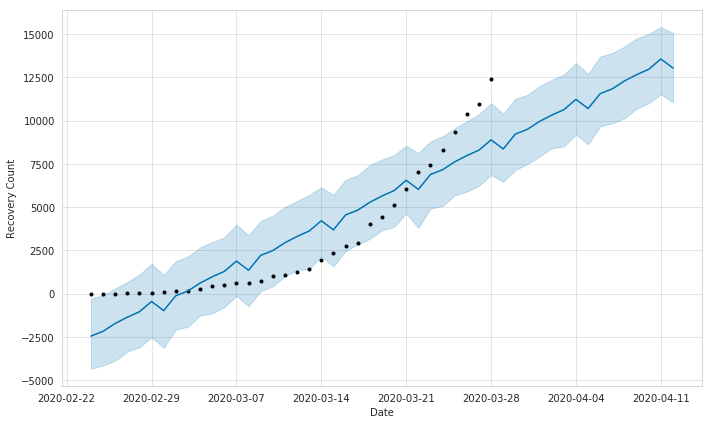

In [0]:
fig_r = plot_plotly(m, forecast_r)
py.iplot(fig_r) 

fig_r = m.plot(forecast_r,xlabel='Date',ylabel='Recovery Count')

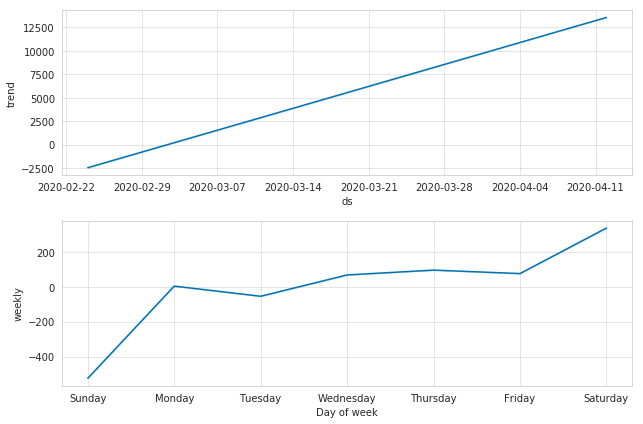

In [0]:
figure_r=m.plot_components(forecast_r)


**For   Deaths**

**Making data ready for algorithm**

In [0]:
pr_data_d = dgd1.loc[:,['Date','Deaths']]
pr_data_d.columns = ['ds','y']
pr_data_d.head()

,ds,y
0,2020-02-24,7
1,2020-02-25,10
2,2020-02-26,12
3,2020-02-27,17
4,2020-02-28,21


**Modelling**

In [0]:
m=Prophet()
m.fit(pr_data_d)
future=m.make_future_dataframe(periods=15)
forecast_d=m.predict(future)
forecast_d

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-02-24,-2072.347193,-3758.080452,-440.415599,-2072.347193,-2072.347193,34.438665,34.438665,34.438665,34.438665,34.438665,34.438665,0.0,0.0,0.0,-2037.908528
1,2020-02-25,-1801.783210,-3490.468551,-55.472900,-1801.783210,-1801.783210,20.867246,20.867246,20.867246,20.867246,20.867246,20.867246,0.0,0.0,0.0,-1780.915963
2,2020-02-26,-1531.219226,-3131.505559,253.485636,-1531.219226,-1531.219226,26.863212,26.863212,26.863212,26.863212,26.863212,26.863212,0.0,0.0,0.0,-1504.356014
3,2020-02-27,-1260.655242,-2888.699326,365.292096,-1260.655242,-1260.655242,20.864683,20.864683,20.864683,20.864683,20.864683,20.864683,0.0,0.0,0.0,-1239.790559
4,2020-02-28,-990.091259,-2551.899727,802.719403,-990.091259,-990.091259,129.823611,129.823611,129.823611,129.823611,129.823611,129.823611,0.0,0.0,0.0,-860.267647
5,2020-02-29,-719.527275,-2217.491983,1266.865018,-719.527275,-719.527275,239.177314,239.177314,239.177314,239.177314,239.177314,239.177314,0.0,0.0,0.0,-480.349961
6,2020-03-01,-448.963291,-2627.812727,766.085585,-448.963291,-448.963291,-472.034731,-472.034731,-472.034731,-472.034731,-472.034731,-472.034731,0.0,0.0,0.0,-920.998022
7,2020-03-02,-178.399307,-1788.586789,1497.104870,-178.399307,-178.399307,34.438665,34.438665,34.438665,34.438665,34.438665,34.438665,0.0,0.0,0.0,-143.960642
8,2020-03-03,92.164678,-1548.115472,1797.505119,92.164678,92.164678,20.867246,20.867246,20.867246,20.867246,20.867246,20.867246,0.0,0.0,0.0,113.031924
9,2020-03-04,362.728662,-1358.585409,2229.032925,362.728662,362.728662,26.863212,26.863212,26.863212,26.863212,26.863212,26.863212,0.0,0.0,0.0,389.591874


**Predicting**

In [0]:
dth = forecast_d.loc[:,['ds','trend']]
dth = dth[dth['trend']>0]
dth=dth.tail(15)
dth.columns = ['Date','Death']
dth.head()


,Date,Death
34,2020-03-29,7137.630639
35,2020-03-30,7408.842004
36,2020-03-31,7680.053370
37,2020-04-01,7951.264735
38,2020-04-02,8222.476101


**Graphical Representation of Predicted Death**

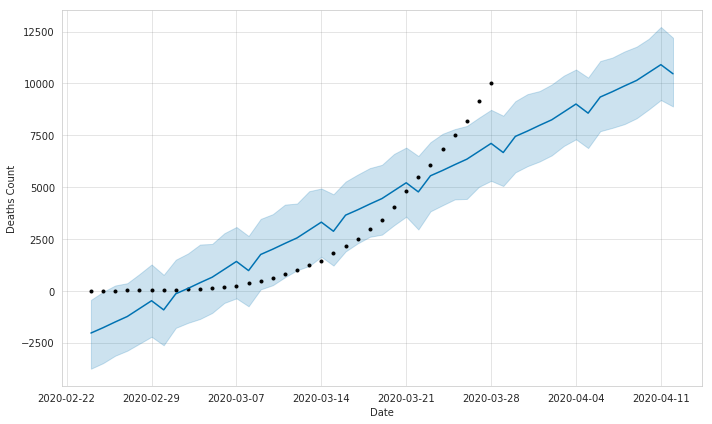

In [0]:
fig_d = plot_plotly(m, forecast_d)
py.iplot(fig_d) 

fig_d = m.plot(forecast_d,xlabel='Date',ylabel='Deaths Count')

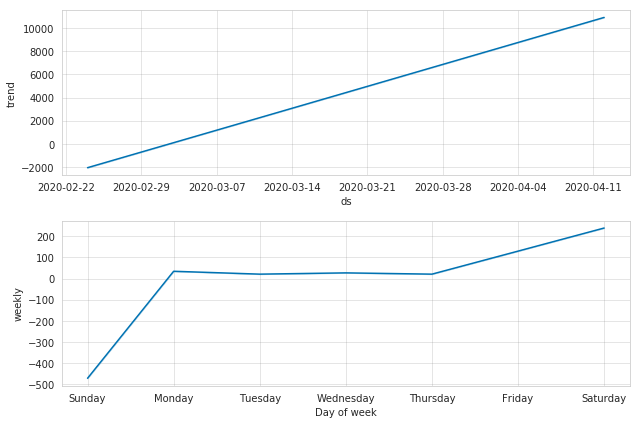

In [0]:
figure_d=m.plot_components(forecast_d)


**The current situation is not under control. According to current data recovery percent of confirmed patients is 53% whereas death is 47% respectively. But the prediction says there will approximately 25000 people who will be recovered and around 14000 people will be dead till Feb 2021. And rest will be in isolation.**

**How future looks like**

In [0]:
prediction = test
prediction['Confirm'] = cnfrm.Confirm
prediction['Recover'] = rec.Recovery
prediction['Death'] = dth.Death

In [0]:
prediction.head()

,Date,Screening,Confirm,Recover,Death
34,2020-03-29,444988.177387,97448.196127,8882.264686,7137.630639
35,2020-03-30,472550.551714,103020.779873,9216.240275,7408.842004
36,2020-03-31,500112.926042,108593.363619,9550.215865,7680.053370
37,2020-04-01,527675.300369,114165.947366,9884.191455,7951.264735
38,2020-04-02,555237.674696,119738.531112,10218.167045,8222.476101


**Future Ratios**

In [0]:
pps_pts = float(prediction.Confirm.sum()/prediction.Screening.sum())
pd_pts = float(prediction.Death.sum()/prediction.Screening.sum())
pr_pps = float(prediction.Recover.sum()/prediction.Confirm.sum())
pd_pps = float(prediction.Death.sum()/prediction.Confirm.sum())

In [0]:
print("The percentage of  Predicted Confirmation is "+ str(pps_pts*100) )
print("The percentage of Predicted Death is "+ str(pd_pts*100) )
print("The percentage of Predicted Death after confirmation is "+ str(pd_pps*100) )
print("The percentage of Predicted recovery after confirmation is "+ str(pr_pps*100) )

The percentage of  Predicted Confirmation is 21.390653388466284
The percentage of Predicted Death is 1.416485176629134
The percentage of Predicted Death after confirmation is 6.621981810957185
The percentage of Predicted recovery after confirmation is 8.222482410179339


**Comparision with other countries**

In [0]:
comp.head()

,country,Canada,China,Italy,US,Spain,Germany,Iran,France,United Kingdom,...,Malaysia,Czechia,Denmark,Ireland,Luxembourg,Japan,Ecuador,Chile,Poland,Pakistan
0,1,0,548,0,1,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
1,2,0,643,0,1,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
2,3,0,920,0,2,0,0,0,2,0,...,0,0,0,0,0,2,0,0,0,0
3,4,0,1406,0,2,0,0,0,3,0,...,3,0,0,0,0,2,0,0,0,0
4,5,1,2075,0,5,0,0,0,3,0,...,4,0,0,0,0,4,0,0,0,0


In [0]:
comp_table = pd.DataFrame(comp.describe().T)
comp_table

,count,mean,std,min,25%,50%,75%,max
country,65.0,33.000000,18.907670,1.0,17.0,33.0,49.0,65.0
Canada,65.0,304.523077,783.966798,0.0,7.0,9.0,79.0,4038.0
China,65.0,58096.923077,30155.859196,548.0,34110.0,77022.0,80887.0,81782.0
Italy,65.0,11183.061538,20955.786061,0.0,3.0,155.0,10149.0,80589.0
US,65.0,5737.969231,16050.951019,1.0,11.0,15.0,959.0,83836.0
Spain,65.0,5226.984615,12263.955568,0.0,1.0,2.0,1695.0,57786.0
Germany,65.0,4298.523077,9817.281039,0.0,13.0,16.0,1457.0,43938.0
Iran,65.0,5160.230769,8224.863815,0.0,0.0,43.0,8042.0,29406.0
France,65.0,3050.061538,6575.851292,0.0,6.0,12.0,1784.0,29155.0
United Kingdom,65.0,1004.800000,2398.795018,0.0,3.0,9.0,382.0,11658.0


In [0]:
comp = comp.loc[:,["Canada","US","Italy","France","Spain","Austria"]]

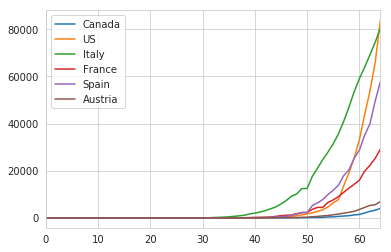

In [0]:
comp.plot()

> **Prevention**
To avoid the critical situation people are suggested to do following
things
*  Avoid contact with people who are sick.
*  Avoid touching your eyes, nose, and mouth.
*  Stay home when you are sick.
*  Cover your cough or sneeze with a tissue, then throw the tissue in
the trash.
*  Clean and disinfect frequently touched objects and surfaces using
a regular household
*  Wash your hands often with soap and water, especially after going
to the bathroom; before eating; and after blowing your nose,
coughing, or sneezing.If soap and water are not readily available, use an alcohol-based
hand sanitizer.